# IF3170 Artificial Intelligence | Tugas Besar 2

This notebook serves as a template for the assignment. Please create a copy of this notebook to complete your work. You can add more code blocks, markdown blocks, or new sections if needed.


Group Number: 36

Group Members:
- Sahabista Arkitanego Armantara (10321009)
- Dean Hartono (10821019)
- Fardhan Indrayesa (12821046)
- Kharris Khisunica (13522051)
- Wikan Priambudi (18321011)

## Import Libraries

In [33]:
%pip install imblearn
%pip install dill
%pip install graphviz
%pip install pydotplus



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import other libraries if needed
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from collections import Counter
from graphviz import Digraph

import sklearn.decomposition as skldec
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

## Import Dataset

In [35]:
# test_data
# additional_feature_test https://drive.google.com/file/d/1u2G1HfLP9CmT_KONw16JL9G79vG6_RQS/view?usp=drive_link
# basic_feature_test https://drive.google.com/file/d/1u29NsNUF64rkaFPes3pFXixvaeHh7uMa/view?usp=drive_link
# content_feature_test https://drive.google.com/file/d/1u1XWijdy6EumwfNGhW5o_YLdXMHDobWM/view?usp=drive_link
# flow_feature_test https://drive.google.com/file/d/1u0h7O-VC59rc4WKCiHgH6vfGWRQmn2s5/view?usp=drive_link
# time_feature_test https://drive.google.com/file/d/1tp4zs65WrqqenEoQDFIb92w59g9C8ugb/view?usp=drive_link
# feature_modified_test https://drive.google.com/file/d/1toPD7KNMPxywjIRq88H2DxM0bfhenU-S/view?usp=drive_link

# train_data
# additional_feature_train https://drive.google.com/file/d/1u9psxYOYlEjKfkQPdqNRnzU5CdkL_pVT/view?usp=drive_link
# basic_feature_train https://drive.google.com/file/d/1uBvolaxmeuvJMh4ClQZf9TU35Ryz1pq7/view?usp=drive_link
# content_feature_train https://drive.google.com/file/d/1tnoJmB6dr3NoKpLKYuB7Q9uuhAjwdnW4/view?usp=drive_link
# flow_feature_train https://drive.google.com/file/d/1u9IfR6WSNKVvHK1ZuiZiqYHR5z_gPYgm/view?usp=drive_link
# label_train https://drive.google.com/file/d/1uGbD5XTLRiMQEknhl5O338ddQ0b7KwmN/view?usp=drive_link
# time_feature_train https://drive.google.com/file/d/1uE4pg2ntEf4IZT2KA-yjmCpSGMgiQBzT/view?usp=drive_link
# feature_modified_train https://drive.google.com/file/d/1tirYJzK_87it-vjihJJRqqF7n59DTN0n/view?usp=drive_link


# Daftar URL untuk data test
test_files = {
    "additional_feature_test": "https://drive.google.com/uc?id=1u2G1HfLP9CmT_KONw16JL9G79vG6_RQS",
    "basic_feature_test": "https://drive.google.com/uc?id=1u29NsNUF64rkaFPes3pFXixvaeHh7uMa",
    "content_feature_test": "https://drive.google.com/uc?id=1u1XWijdy6EumwfNGhW5o_YLdXMHDobWM",
    "flow_feature_test": "https://drive.google.com/uc?id=1u0h7O-VC59rc4WKCiHgH6vfGWRQmn2s5",
    "time_feature_test": "https://drive.google.com/uc?id=1tp4zs65WrqqenEoQDFIb92w59g9C8ugb"
}

# Daftar URL untuk data train
train_files = {
    "flow_feature_train": "https://drive.google.com/uc?id=1u9IfR6WSNKVvHK1ZuiZiqYHR5z_gPYgm",
    "basic_feature_train": "https://drive.google.com/uc?id=1uBvolaxmeuvJMh4ClQZf9TU35Ryz1pq7",
    "content_feature_train": "https://drive.google.com/uc?id=1tnoJmB6dr3NoKpLKYuB7Q9uuhAjwdnW4",
    "time_feature_train": "https://drive.google.com/uc?id=1uE4pg2ntEf4IZT2KA-yjmCpSGMgiQBzT",
    "additional_feature_train": "https://drive.google.com/uc?id=1u9psxYOYlEjKfkQPdqNRnzU5CdkL_pVT",
    "label_train": "https://drive.google.com/uc?id=1uGbD5XTLRiMQEknhl5O338ddQ0b7KwmN"
}

# Fungsi untuk mengunduh dan memuat data
def load_data(file_dict):
    dfMerged = None
    for name, url in file_dict.items():
        if dfMerged is None:
          dfMerged = pd.read_csv(url)
        elif name == None:
          break
        else:
          dfMerged = dfMerged.merge(pd.read_csv(url))

    return dfMerged

# Memuat data test dan train
test_data = load_data(test_files)
train_data = load_data(train_files).drop('id', axis=1)
train_data_copy = train_data.copy() #Copy raw

In [36]:
train_data.columns

Index(['proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss',
       'dloss', 'service', 'sload', 'dload', 'spkts', 'dpkts', 'swin', 'dwin',
       'stcpb', 'dtcpb', 'smean', 'dmean', 'trans_depth', 'response_body_len',
       'sjit', 'djit', 'sinpkt', 'dinpkt', 'tcprtt', 'synack', 'ackdat',
       'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login',
       'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat',
       'label'],
      dtype='object')

# Exploratory Data Analysis (Optional)

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis.

## Data Size

In [37]:
train_data.shape

(175341, 43)

## Data Types

In [38]:
train_data.dtypes

proto                 object
state                 object
dur                  float64
sbytes               float64
dbytes               float64
sttl                 float64
dttl                 float64
sloss                float64
dloss                float64
service               object
sload                float64
dload                float64
spkts                float64
dpkts                float64
swin                 float64
dwin                 float64
stcpb                float64
dtcpb                float64
smean                float64
dmean                float64
trans_depth          float64
response_body_len    float64
sjit                 float64
djit                 float64
sinpkt               float64
dinpkt               float64
tcprtt               float64
synack               float64
ackdat               float64
is_sm_ips_ports      float64
ct_state_ttl         float64
ct_flw_http_mthd     float64
is_ftp_login         float64
ct_ftp_cmd           float64
ct_srv_src    

## Seperate Categorical and Numerical Data

In [39]:
# Train data
categorical_train_data = train_data.loc[:, (train_data.dtypes == 'object') | (train_data.columns.str.contains('is')) | (train_data.columns.str.contains('label'))]

numerical_train_data = train_data.loc[:, ~((train_data.dtypes == 'object') | (train_data.columns.str.contains('is')) | (train_data.columns.str.contains('label')))]

# Test data
categorical_test_data = test_data.loc[:, (test_data.dtypes == 'object') | (test_data.columns.str.contains('is')) | (test_data.columns.str.contains('label'))]

numerical_test_data = test_data.loc[:, ~((test_data.dtypes == 'object') | (test_data.columns.str.contains('is')) | (test_data.columns.str.contains('label')))]

In [40]:
categorical_train_data.columns

Index(['proto', 'state', 'service', 'is_sm_ips_ports', 'is_ftp_login',
       'attack_cat', 'label'],
      dtype='object')

## Unique Values for Categorical Values

In [41]:
categorical_train_data.nunique()

proto              133
state                9
service             13
is_sm_ips_ports      2
is_ftp_login         4
attack_cat          10
label                2
dtype: int64

## Stats for non Categorical Values

In [42]:
numerical_train_data.describe()

,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,sload,dload,spkts,...,ct_state_ttl,ct_flw_http_mthd,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
count,166619.000000,1.667800e+05,1.664720e+05,166516.000000,166687.000000,166547.000000,166363.000000,1.665550e+05,1.665040e+05,166687.000000,...,166706.000000,166694.000000,166499.000000,166490.000000,166567.000000,166603.000000,166518.000000,166566.000000,166553.000000,166446.000000
mean,1.359299,8.734079e+03,1.493589e+04,179.521944,79.584179,4.904790,6.971688,7.342186e+07,6.718596e+05,20.266134,...,1.303852,0.132722,0.014961,9.304415,9.104384,6.191773,6.952450,5.388116,4.198363,8.731000
std,6.485386,1.712289e+05,1.430150e+05,102.957427,110.494848,64.867849,51.801936,1.884564e+08,2.422879e+06,136.433895,...,0.954779,0.692019,0.125771,10.699782,10.758098,8.050067,8.318103,8.044942,5.775348,10.956486
min,0.000000,2.800000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000008,1.140000e+02,0.000000e+00,62.000000,0.000000,0.000000,0.000000,1.303032e+04,0.000000e+00,2.000000,...,1.000000,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000
50%,0.001548,4.500000e+02,1.640000e+02,254.000000,29.000000,0.000000,0.000000,8.714544e+05,1.426630e+03,2.000000,...,1.000000,0.000000,0.000000,5.000000,4.000000,2.000000,3.000000,1.000000,1.000000,3.000000
75%,0.667311,1.418000e+03,1.096000e+03,254.000000,252.000000,3.000000,2.000000,8.888889e+07,2.807410e+04,12.000000,...,2.000000,0.000000,0.000000,12.000000,12.000000,7.000000,9.000000,5.000000,3.000000,12.000000
max,59.999989,1.296523e+07,1.465555e+07,255.000000,254.000000,4803.000000,5484.000000,5.988000e+09,2.242273e+07,9616.000000,...,6.000000,30.000000,4.000000,63.000000,62.000000,51.000000,60.000000,51.000000,46.000000,65.000000


## Missing Values

In [43]:
train_data.isnull().sum()

proto                8826
state                8805
dur                  8722
sbytes               8561
dbytes               8869
sttl                 8825
dttl                 8654
sloss                8794
dloss                8978
service              8791
sload                8786
dload                8837
spkts                8654
dpkts                8686
swin                 8740
dwin                 8779
stcpb                8672
dtcpb                8803
smean                8788
dmean                8855
trans_depth          8785
response_body_len    8791
sjit                 8738
djit                 8846
sinpkt               8707
dinpkt               8734
tcprtt               8836
synack               8736
ackdat               8595
is_sm_ips_ports      8746
ct_state_ttl         8635
ct_flw_http_mthd     8647
is_ftp_login         8647
ct_ftp_cmd           8842
ct_srv_src           8851
ct_srv_dst           8774
ct_dst_ltm           8738
ct_src_ltm           8823
ct_src_dport

## Number of Duplicate Columns

In [44]:
train_data.duplicated().sum()

5756

## Distribution of Values

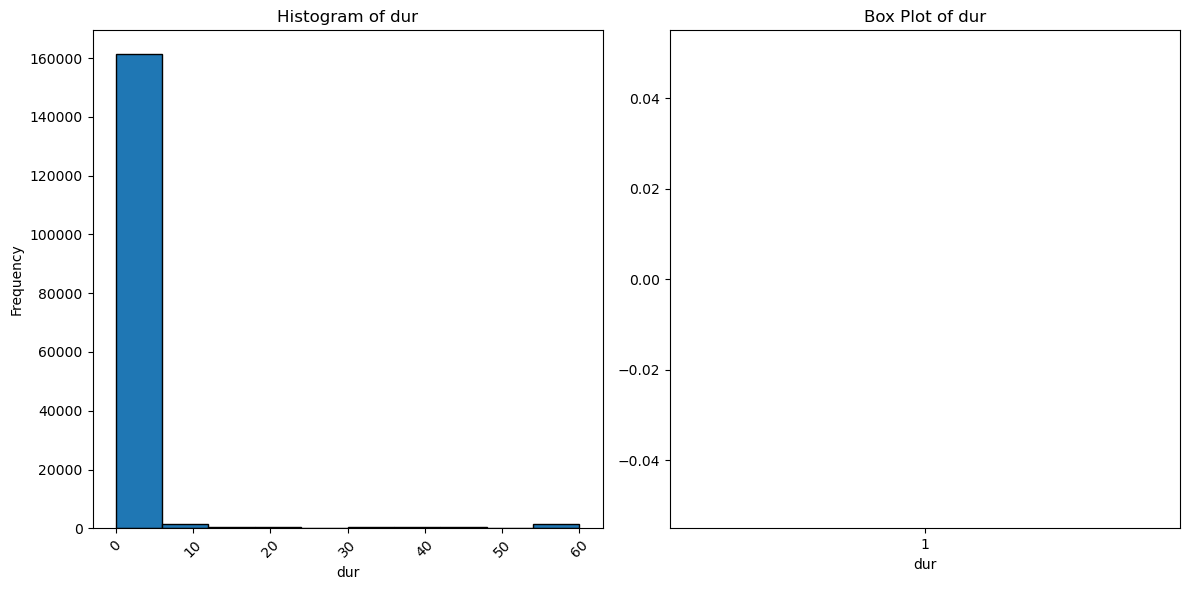

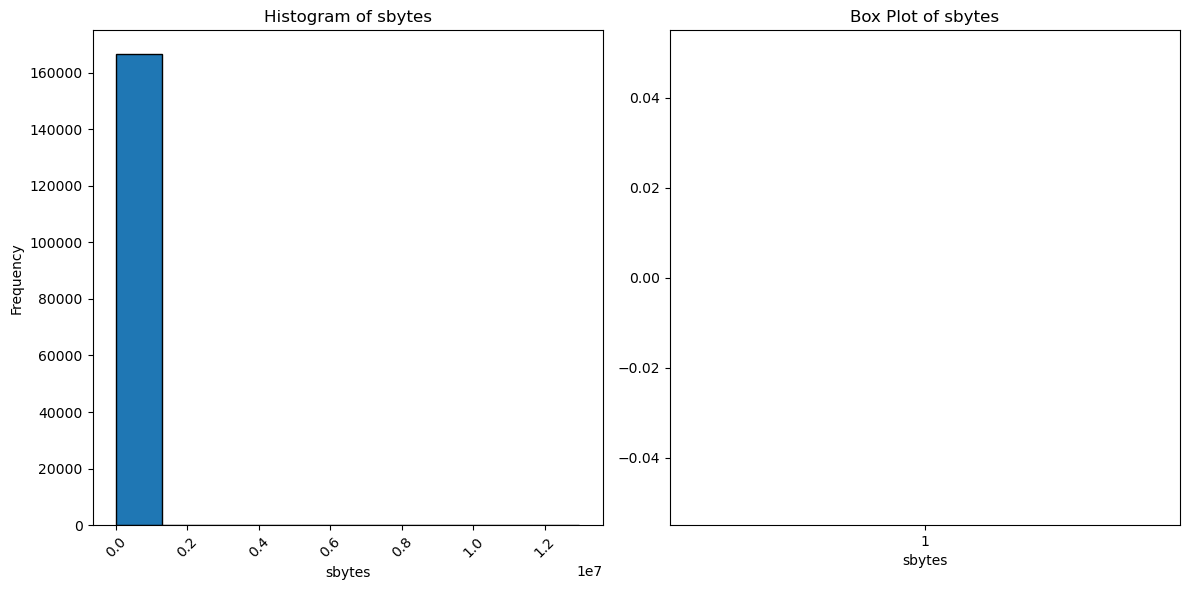

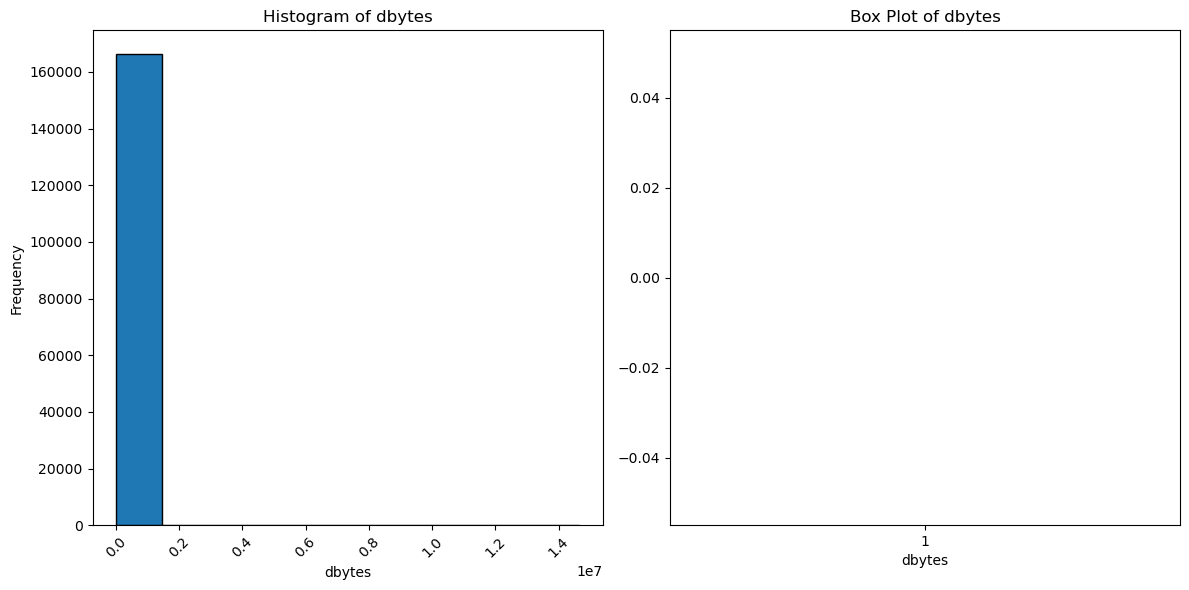

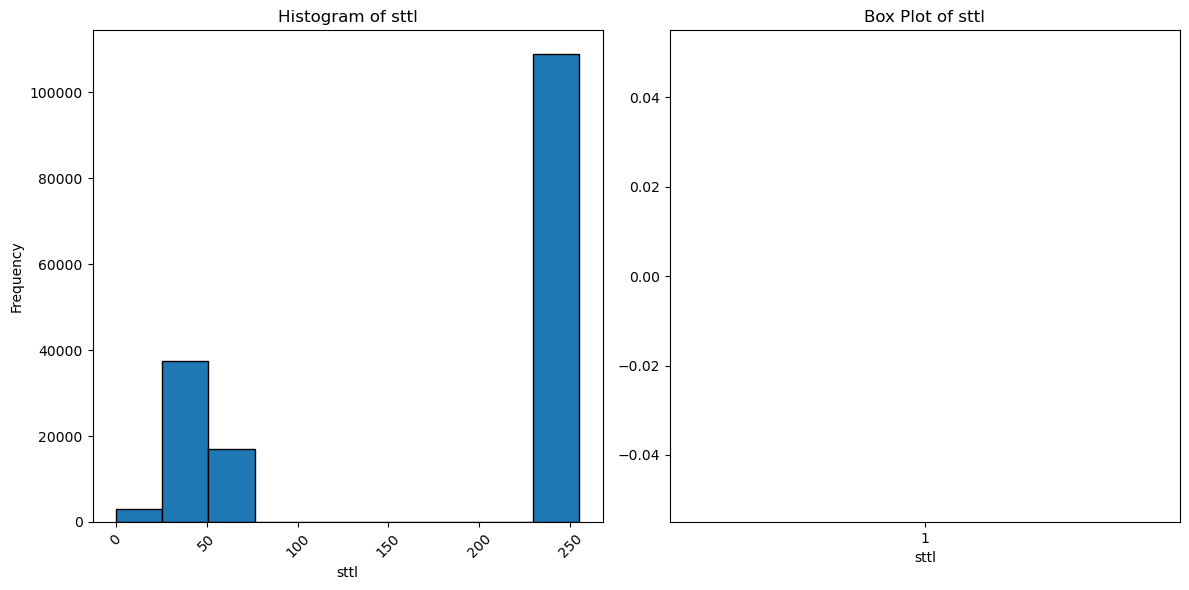

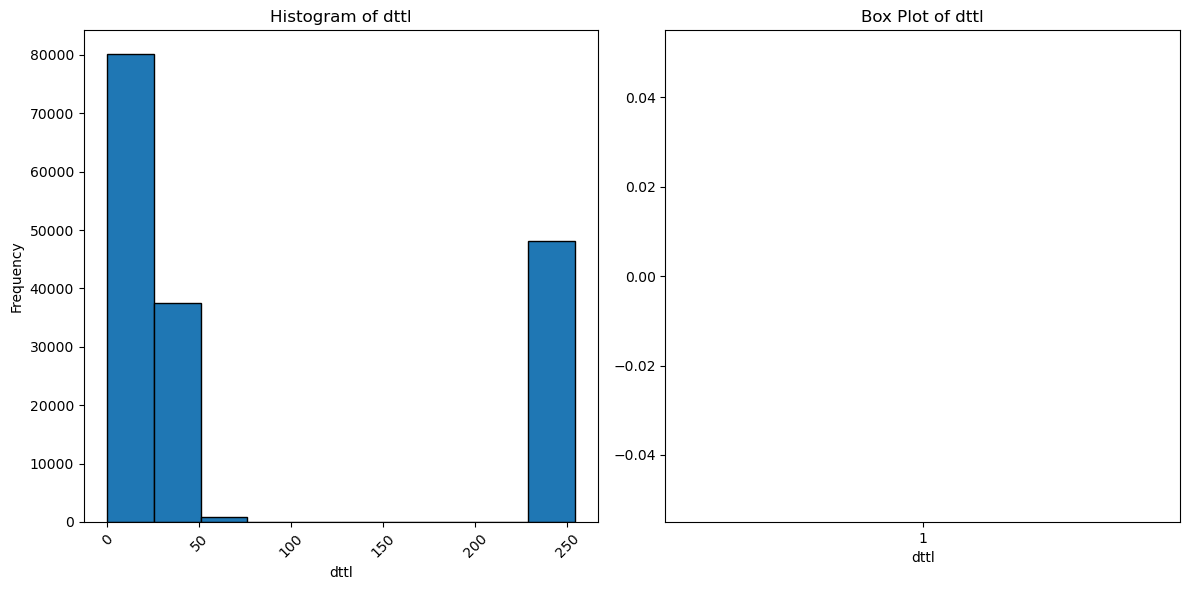

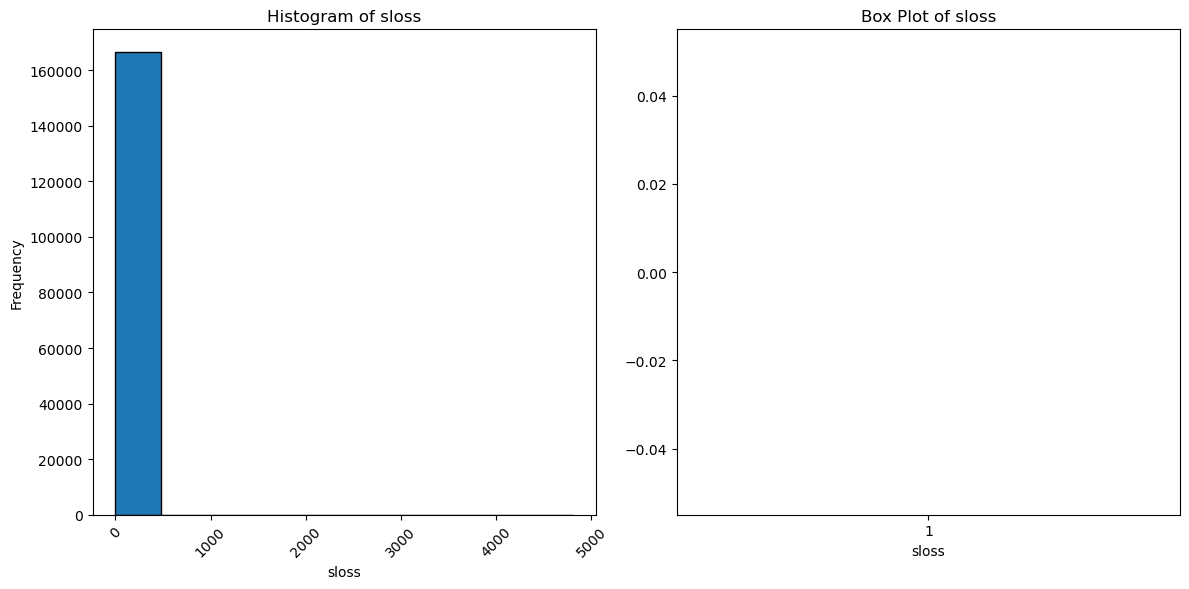

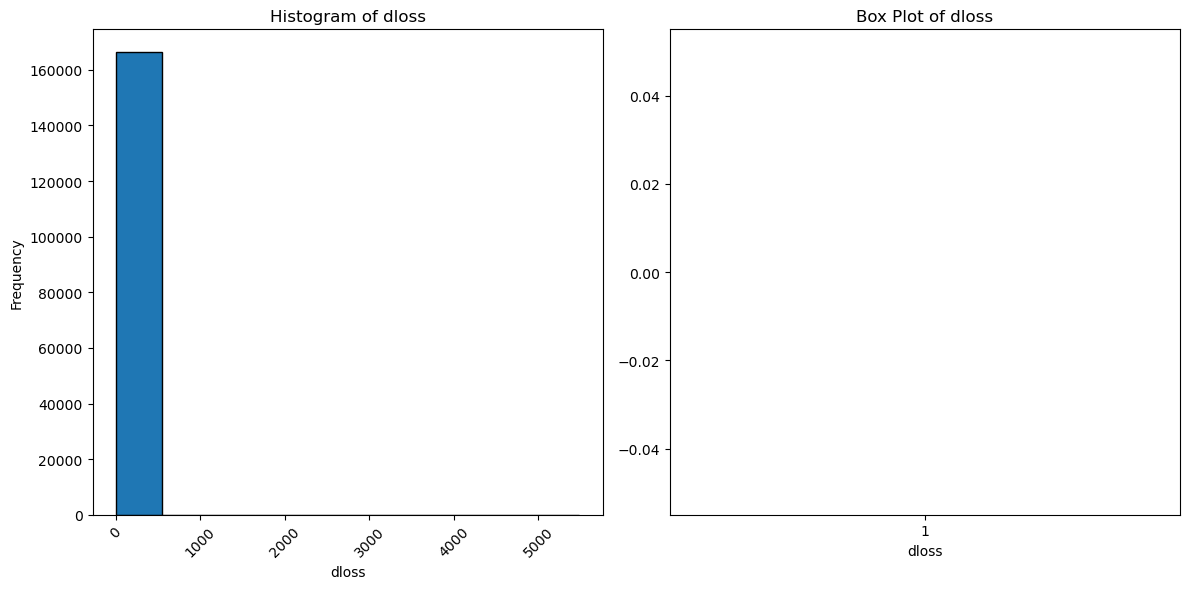

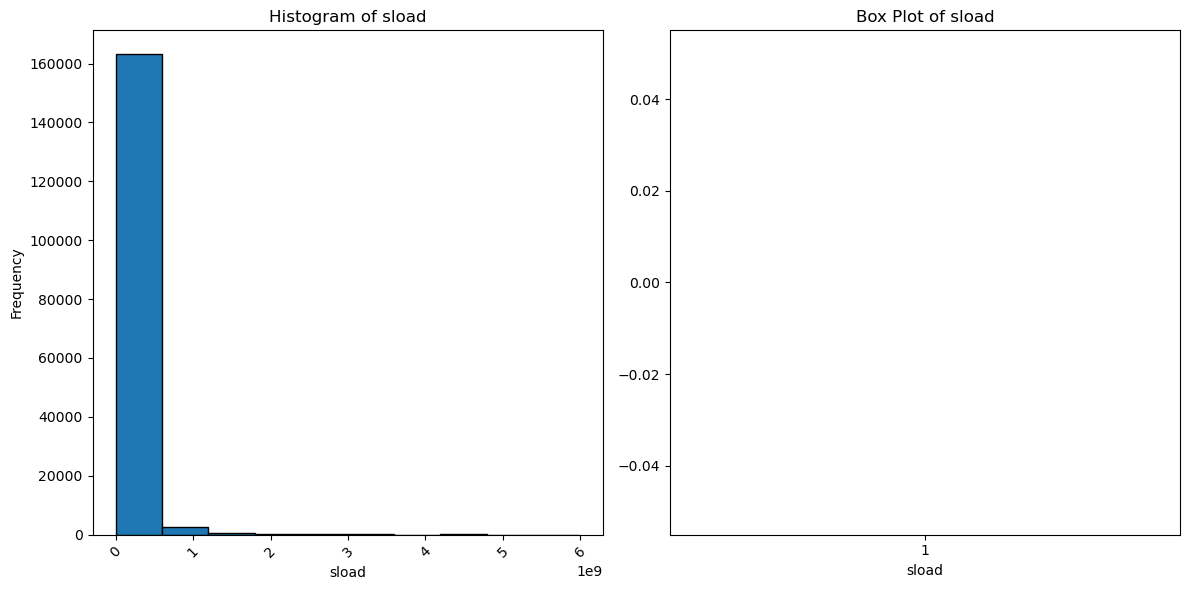

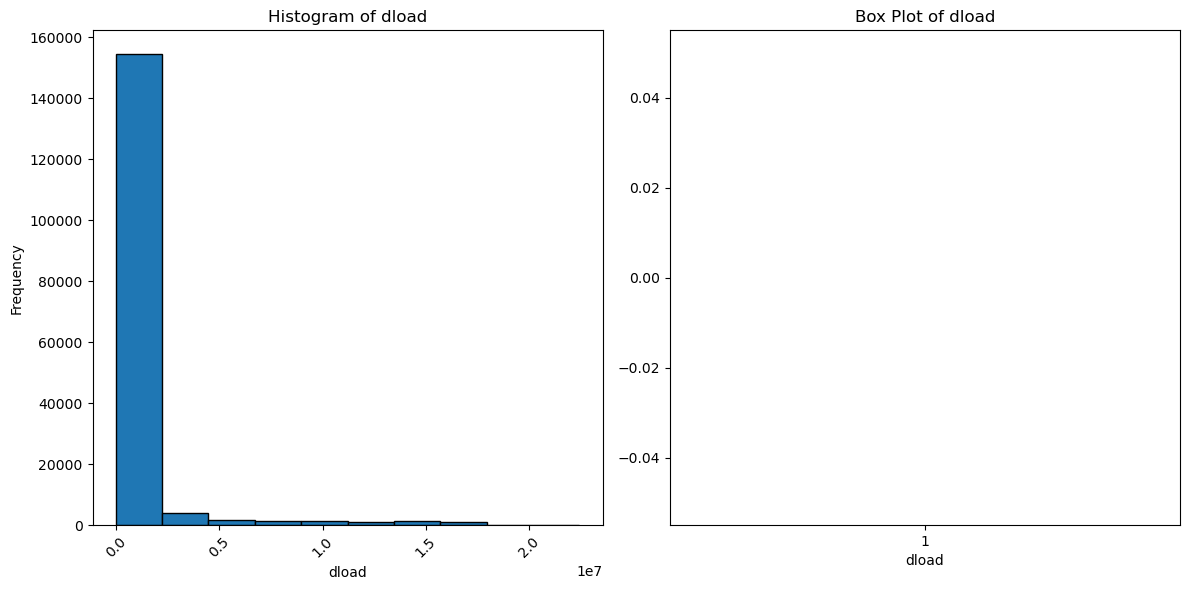

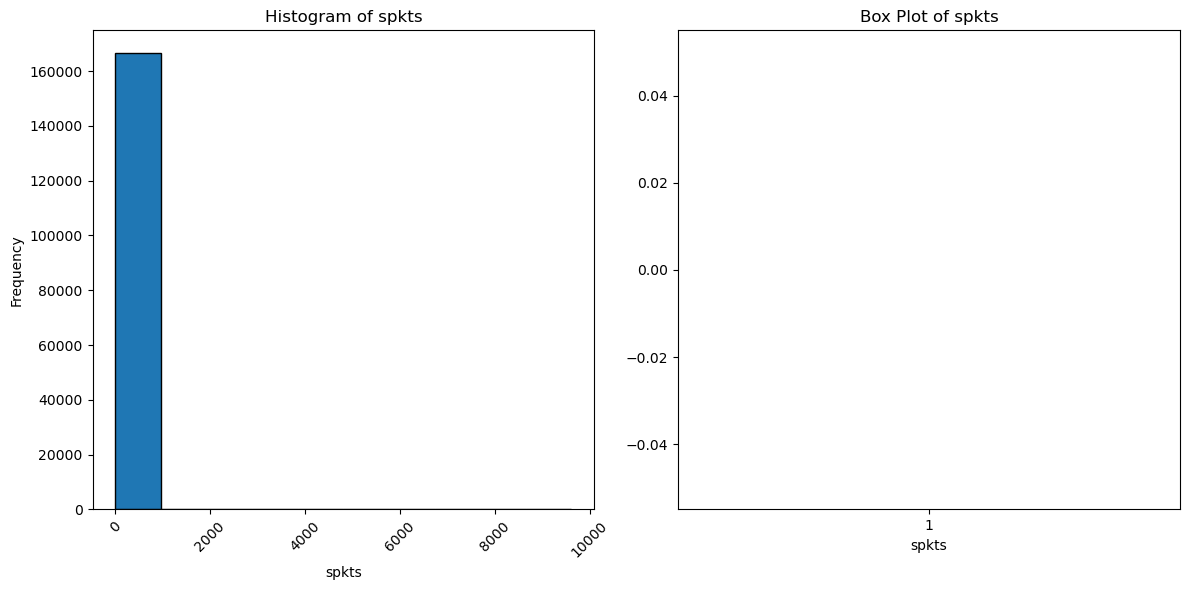

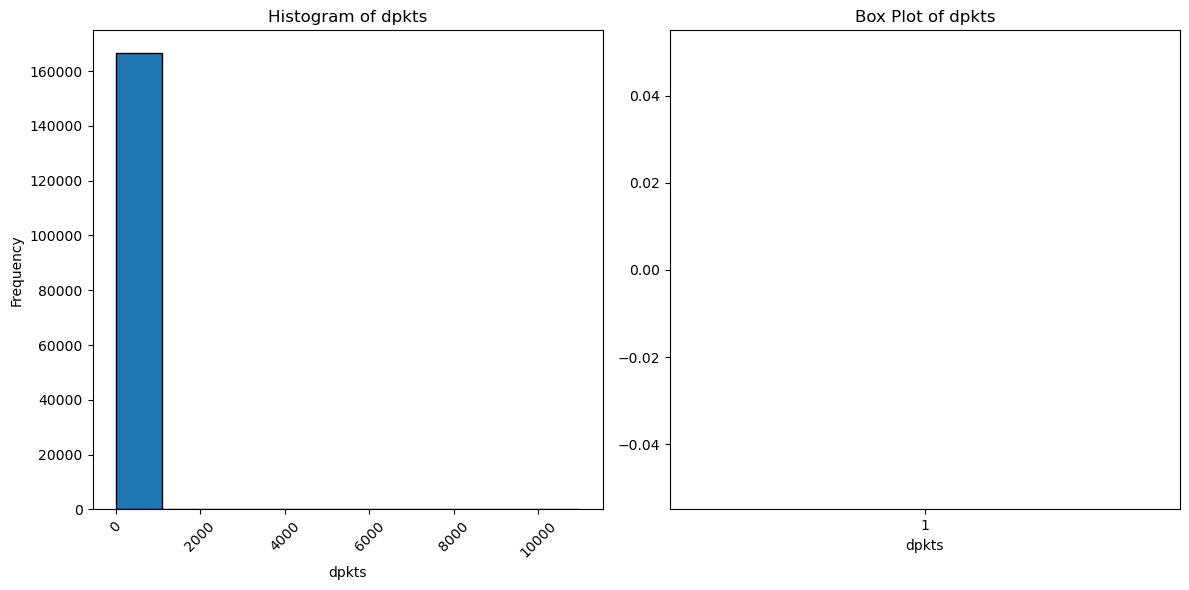

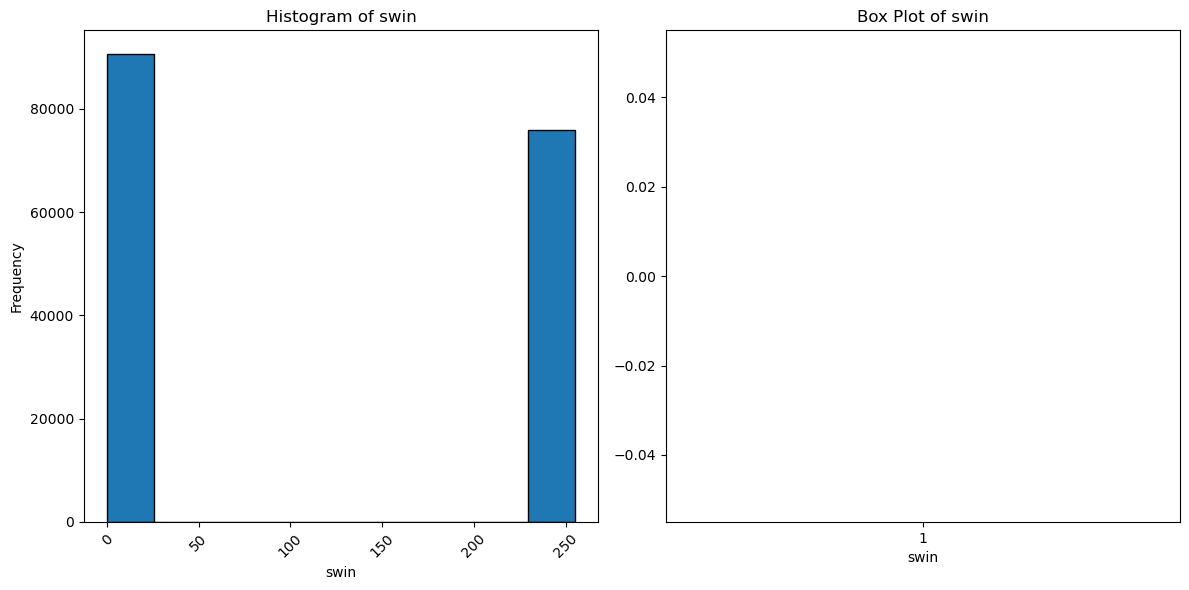

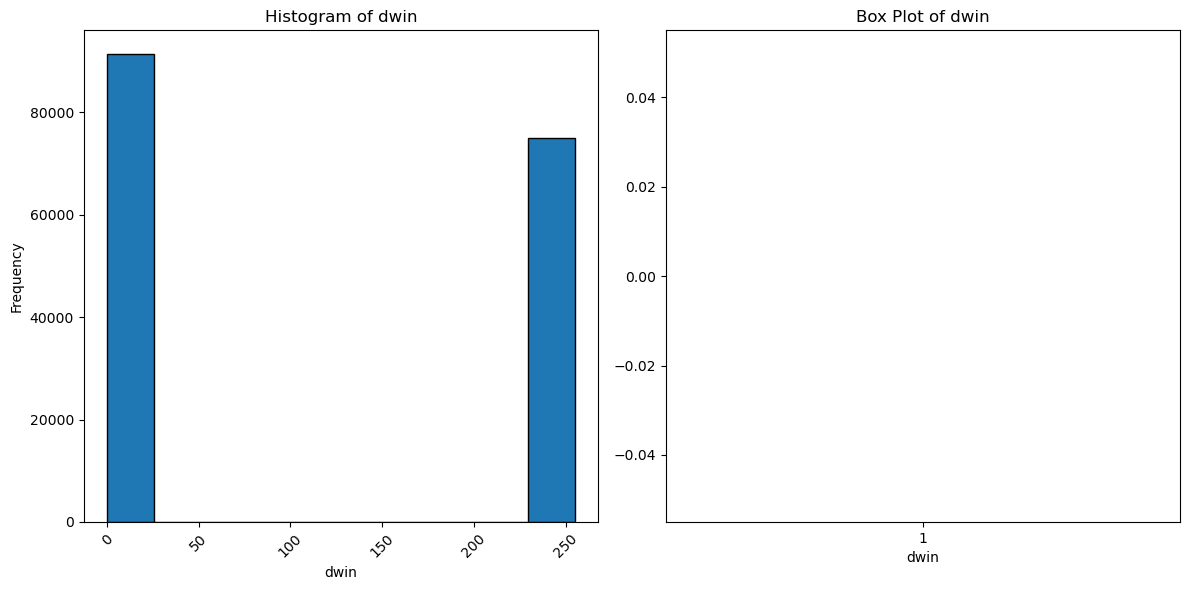

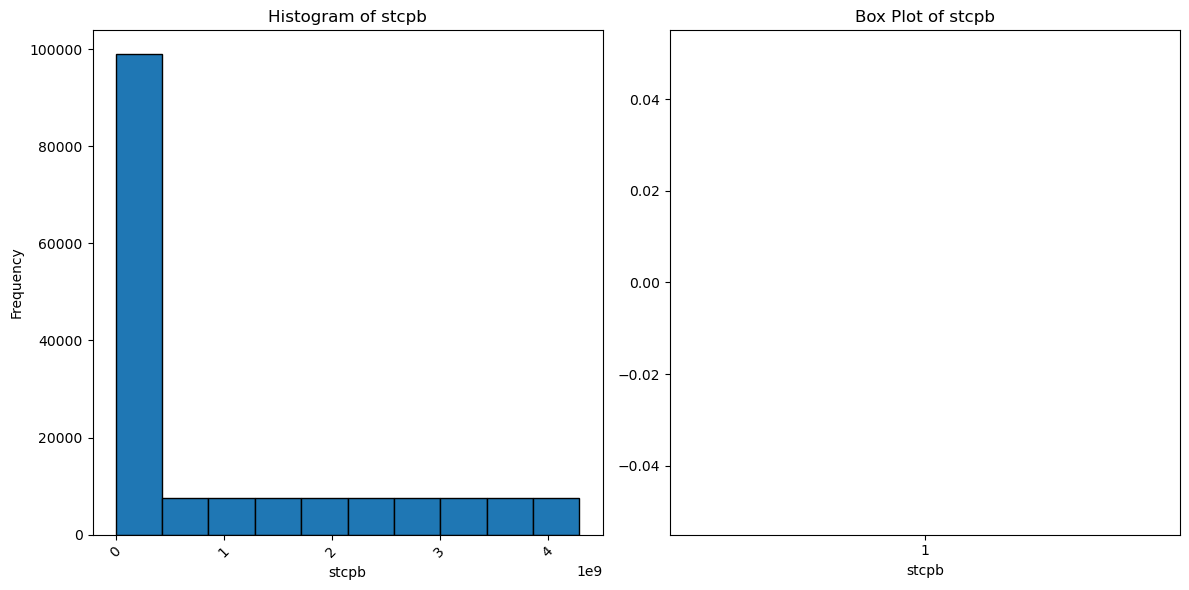

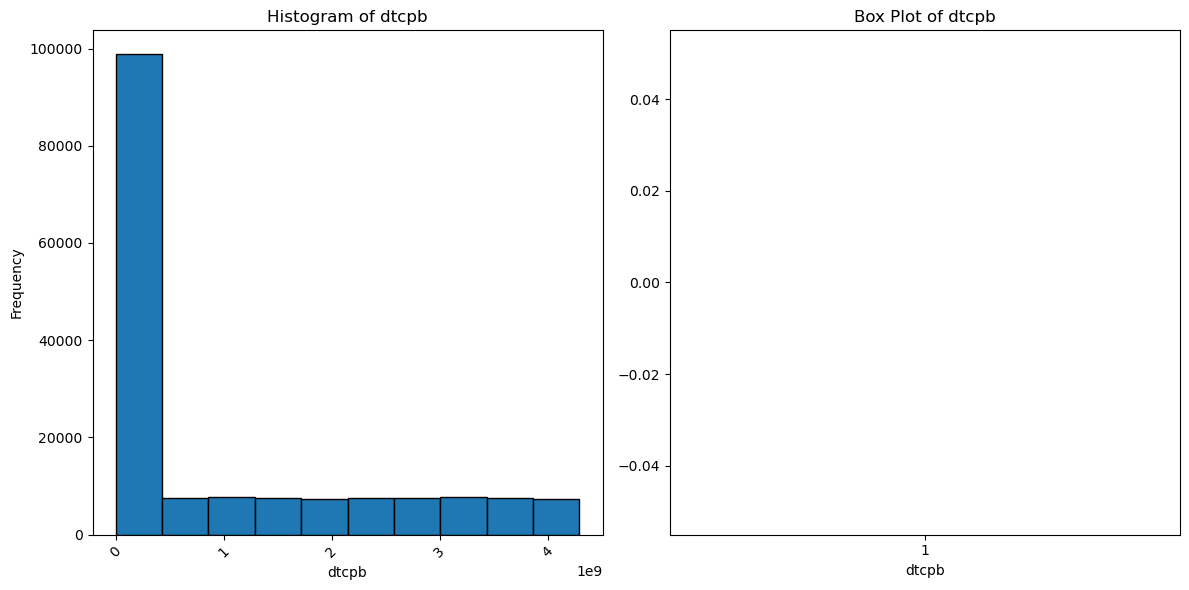

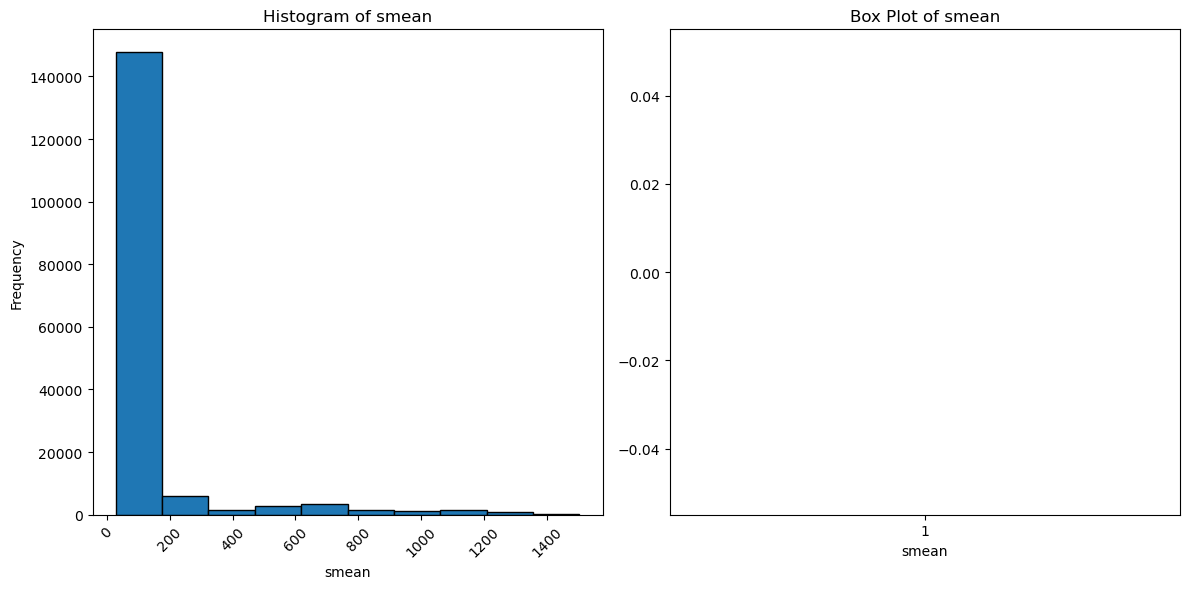

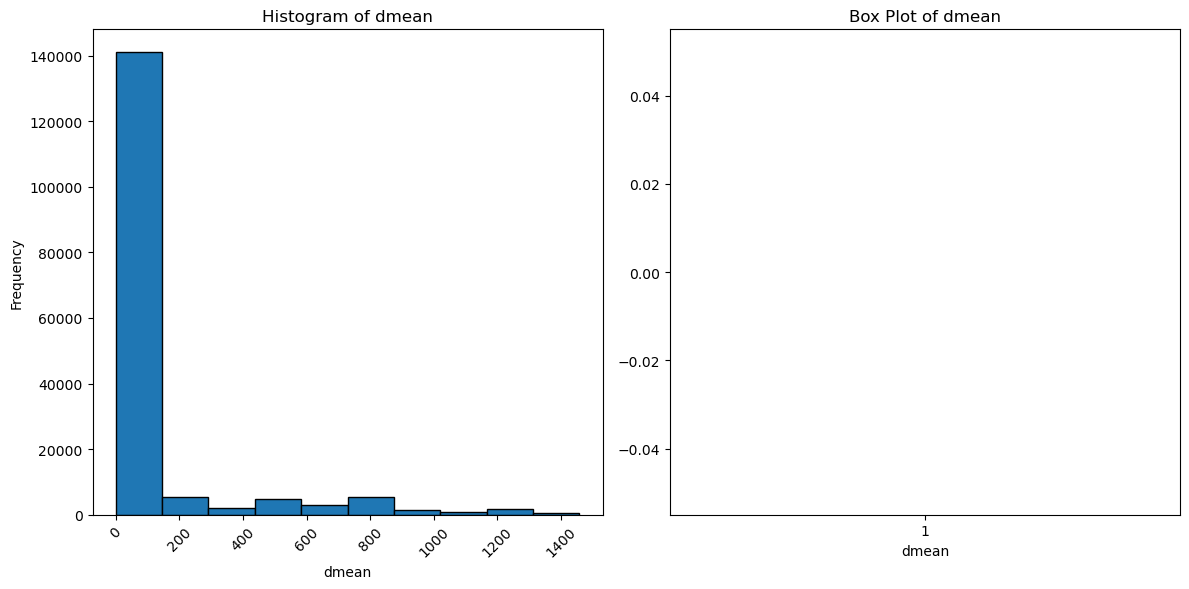

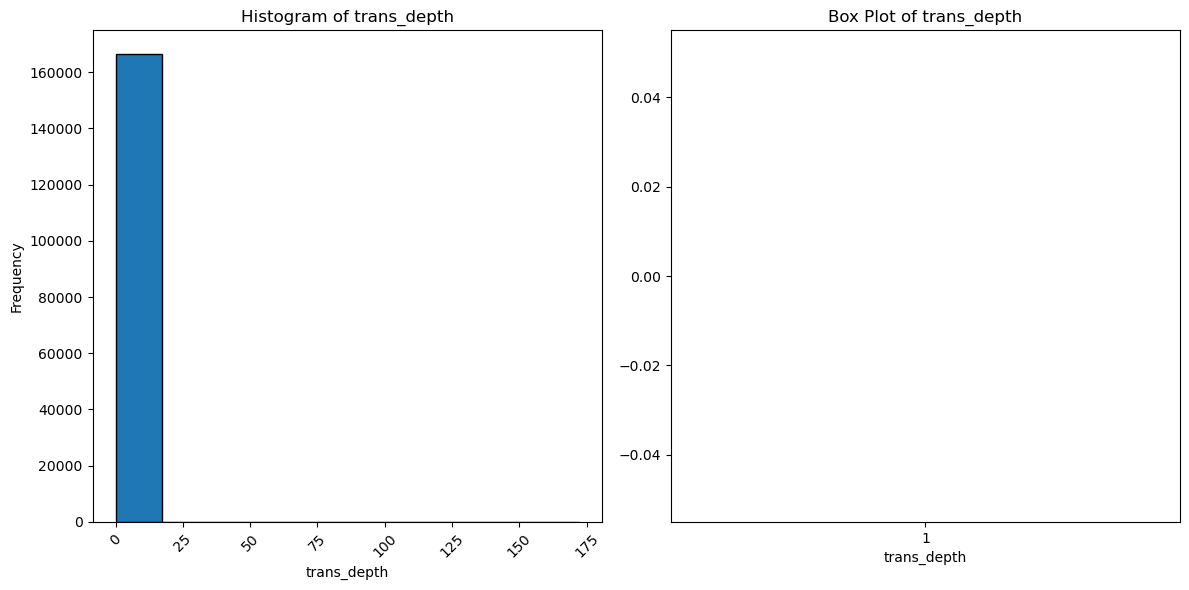

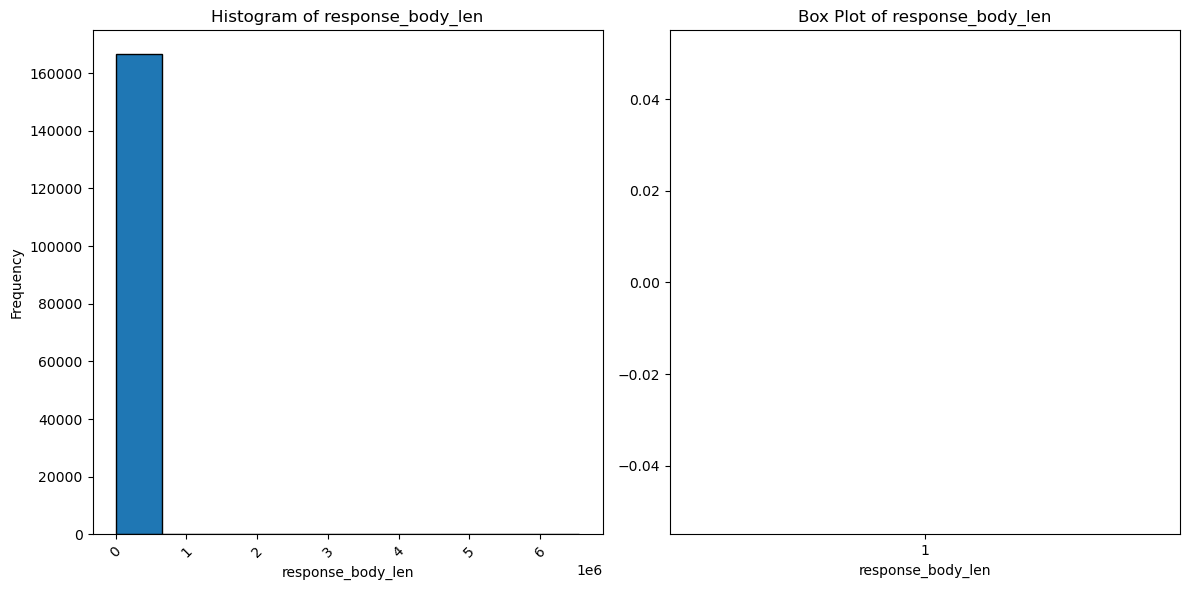

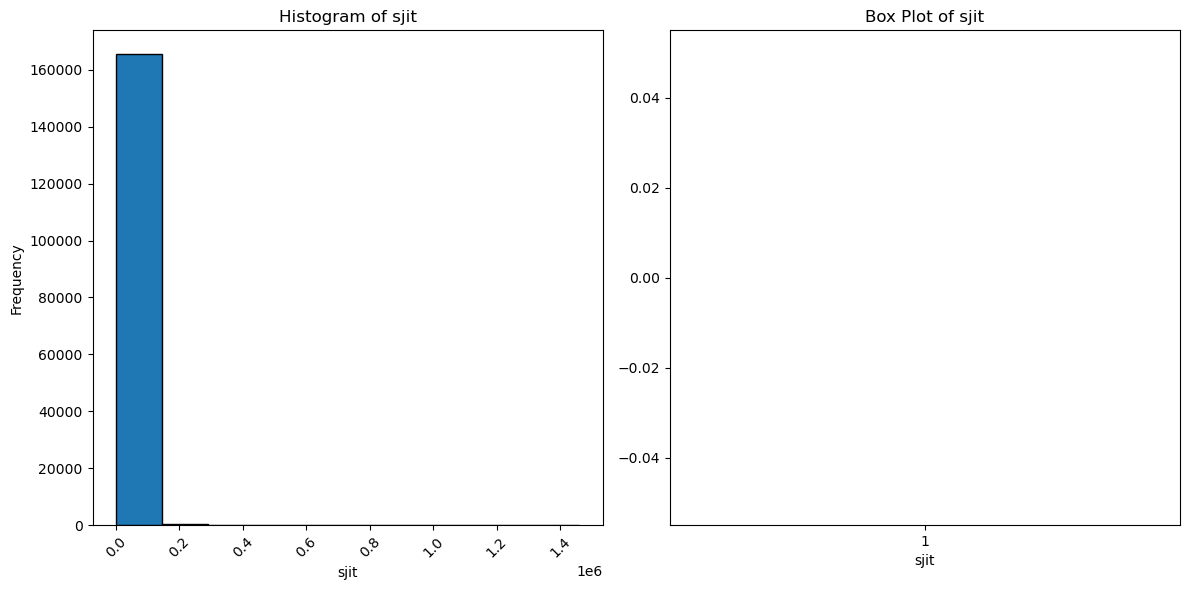

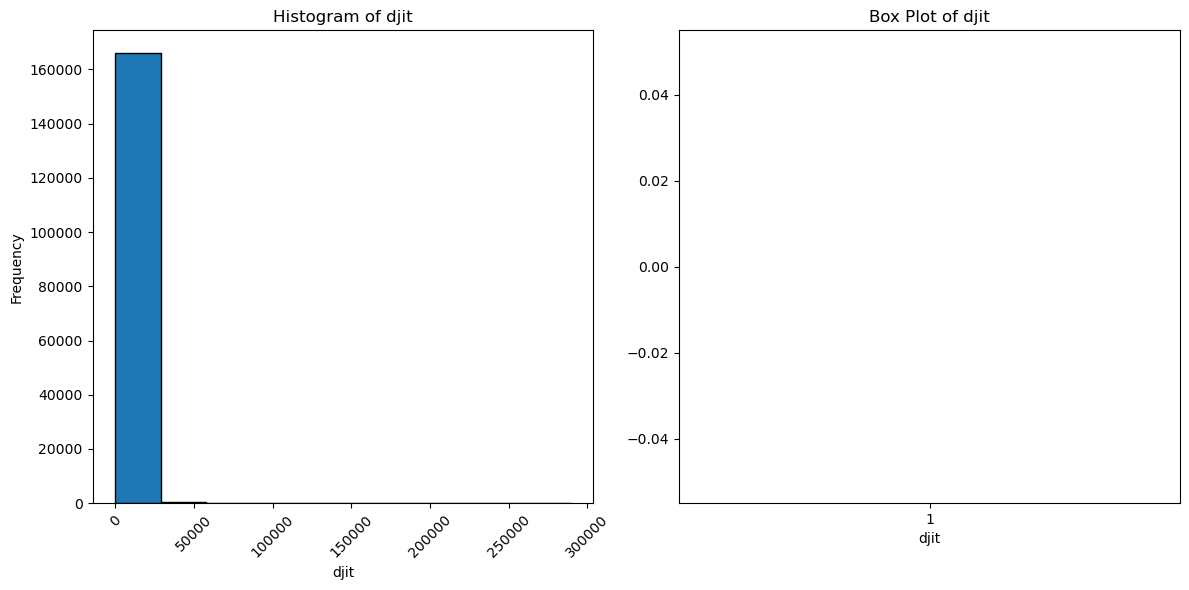

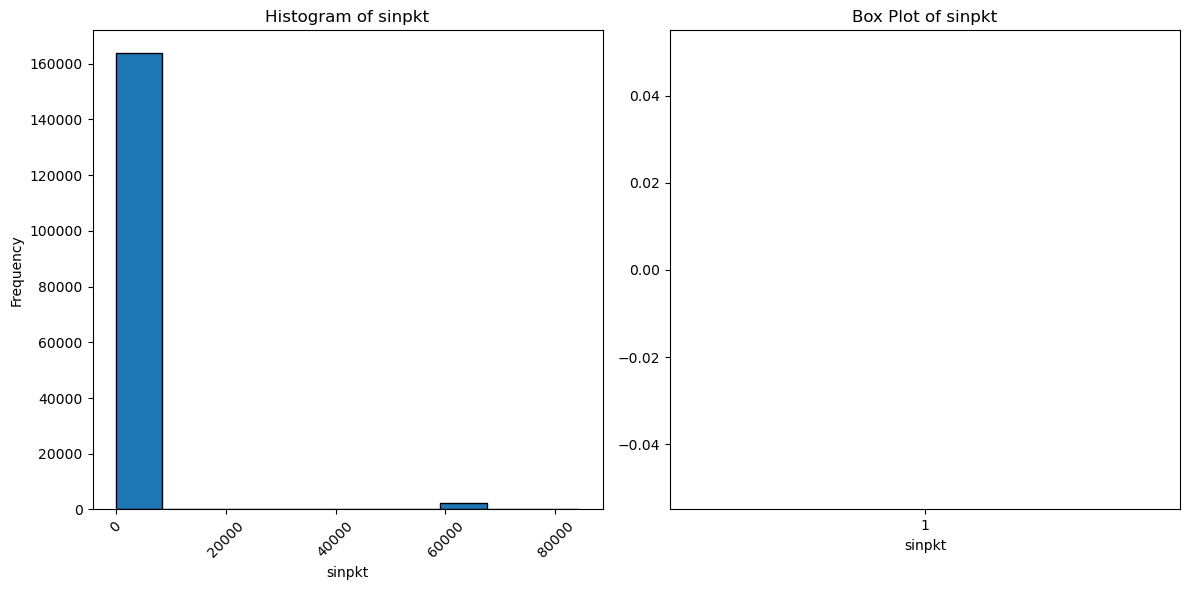

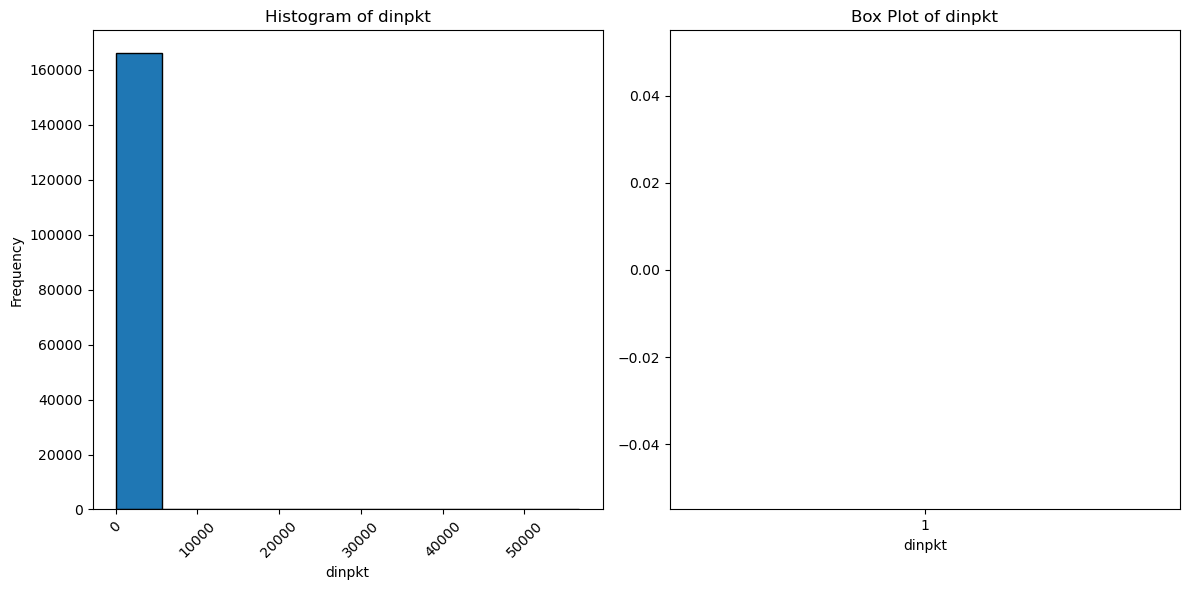

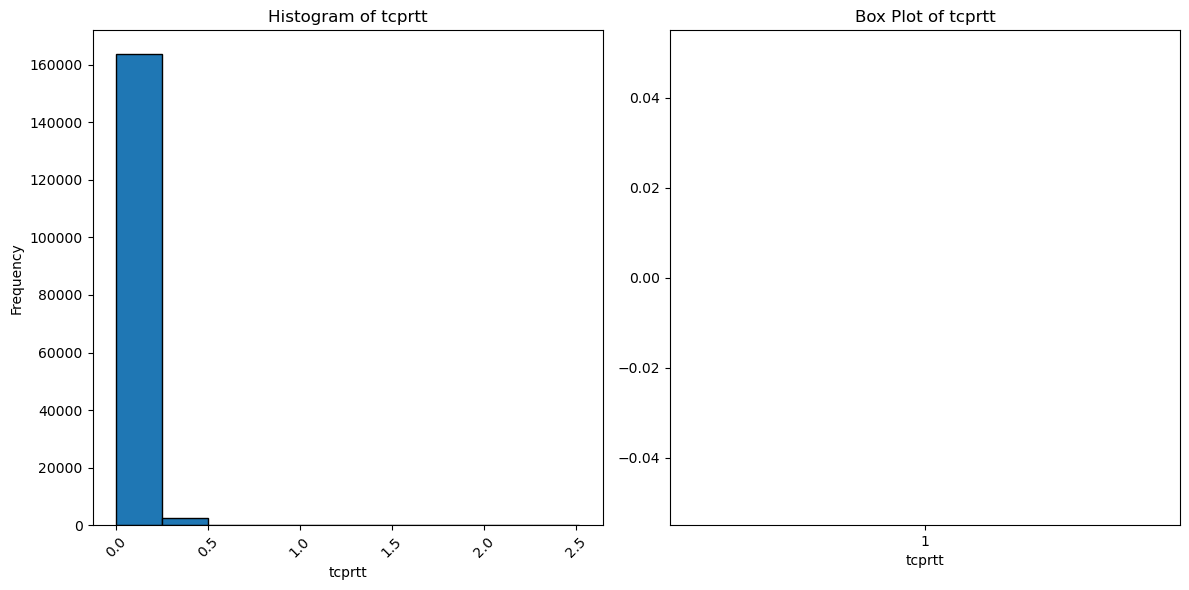

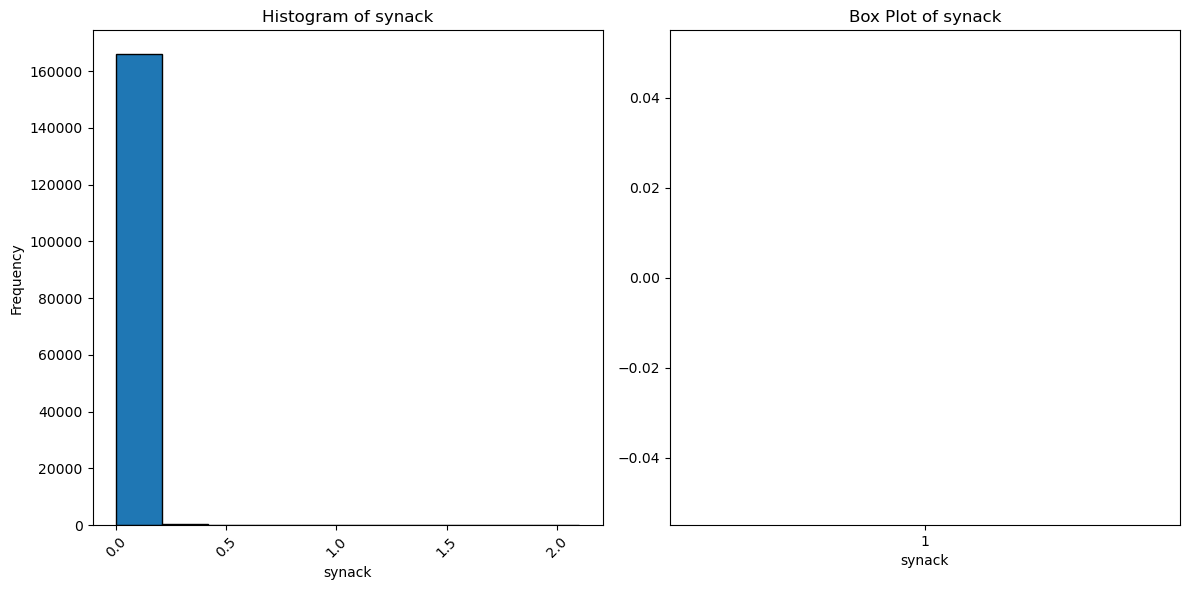

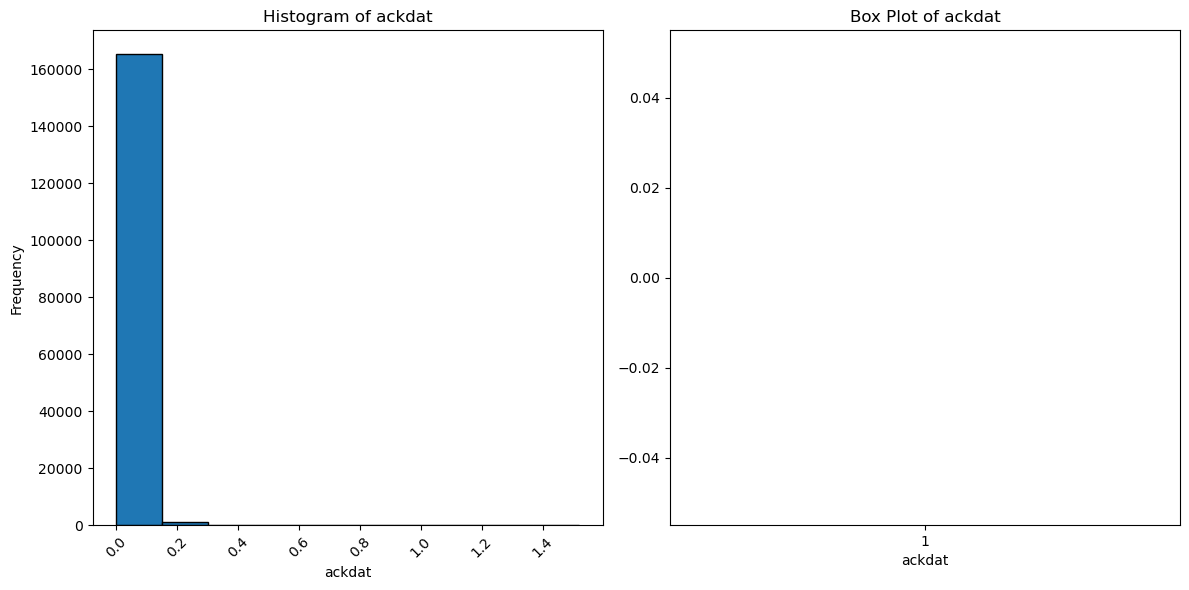

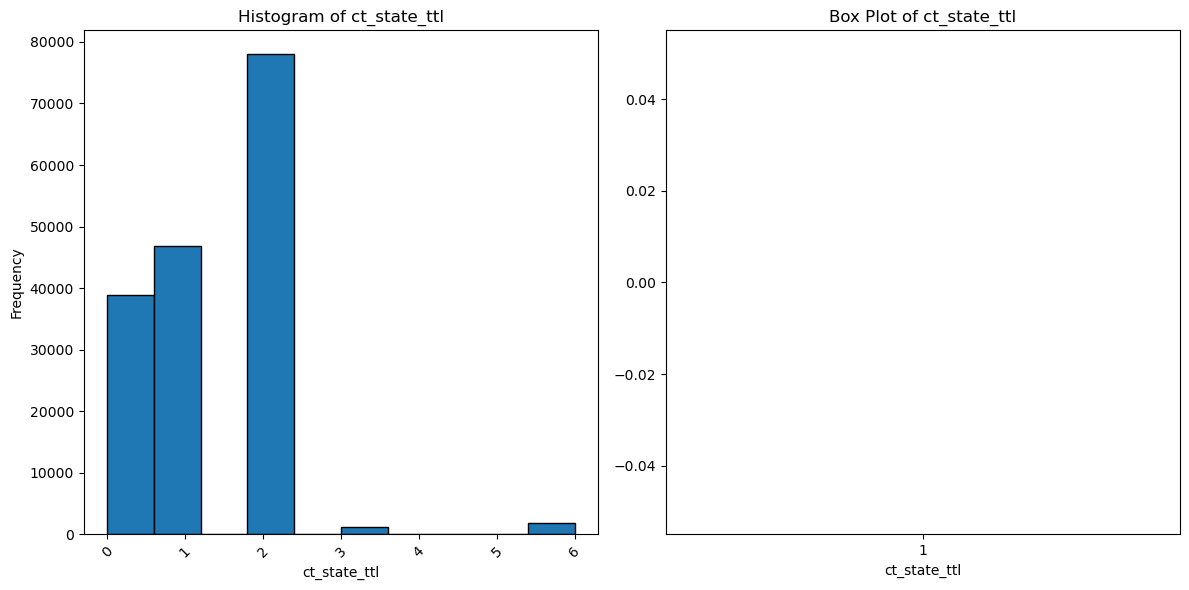

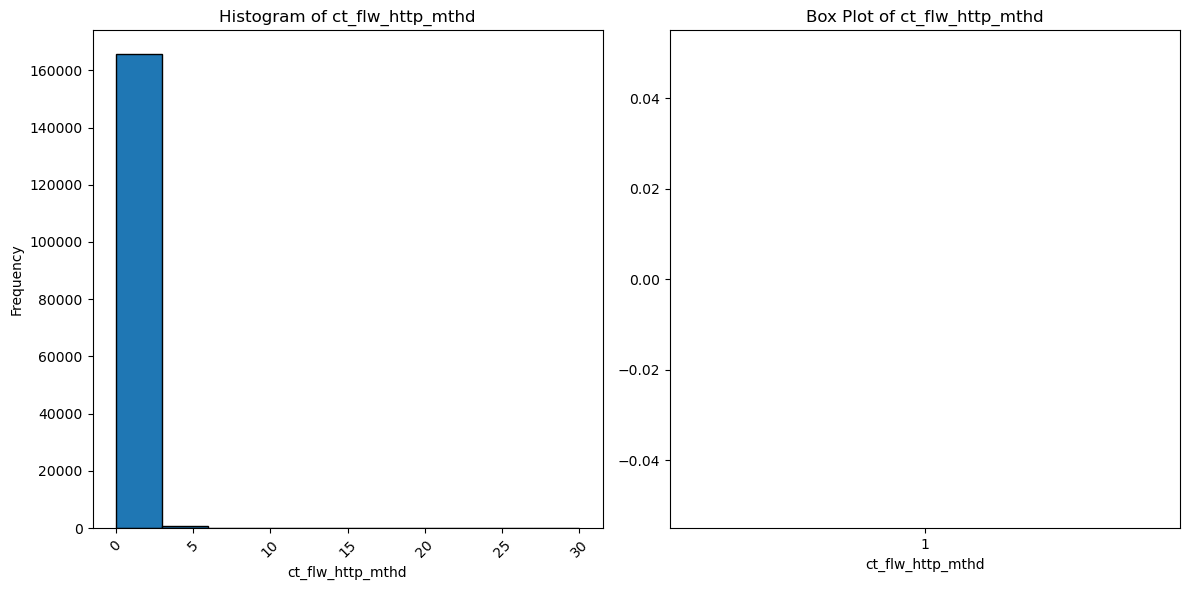

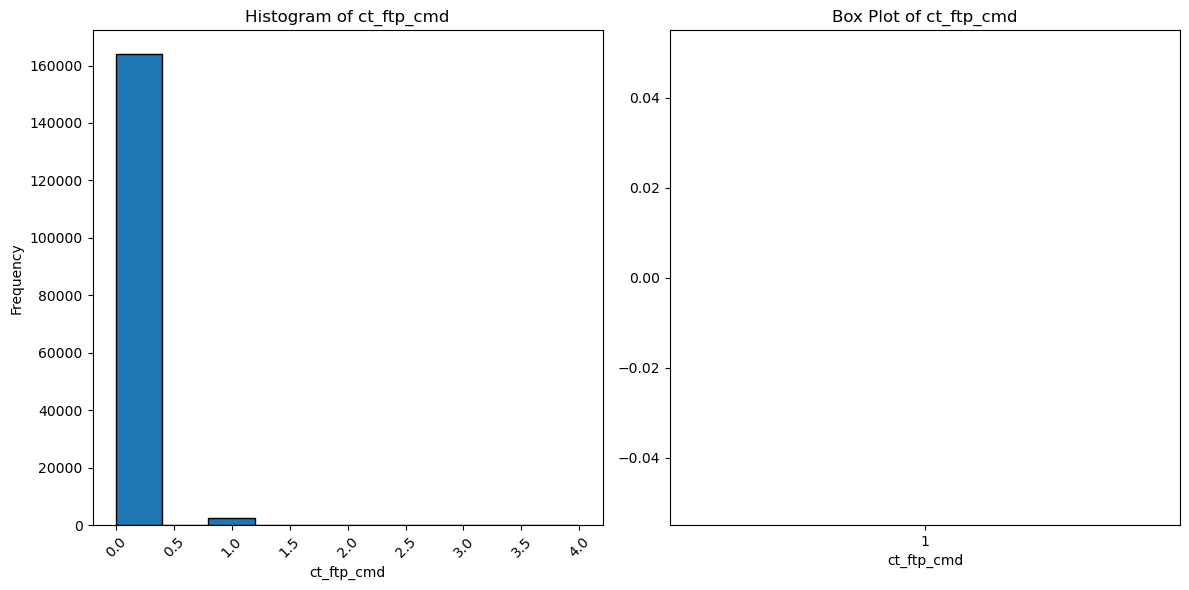

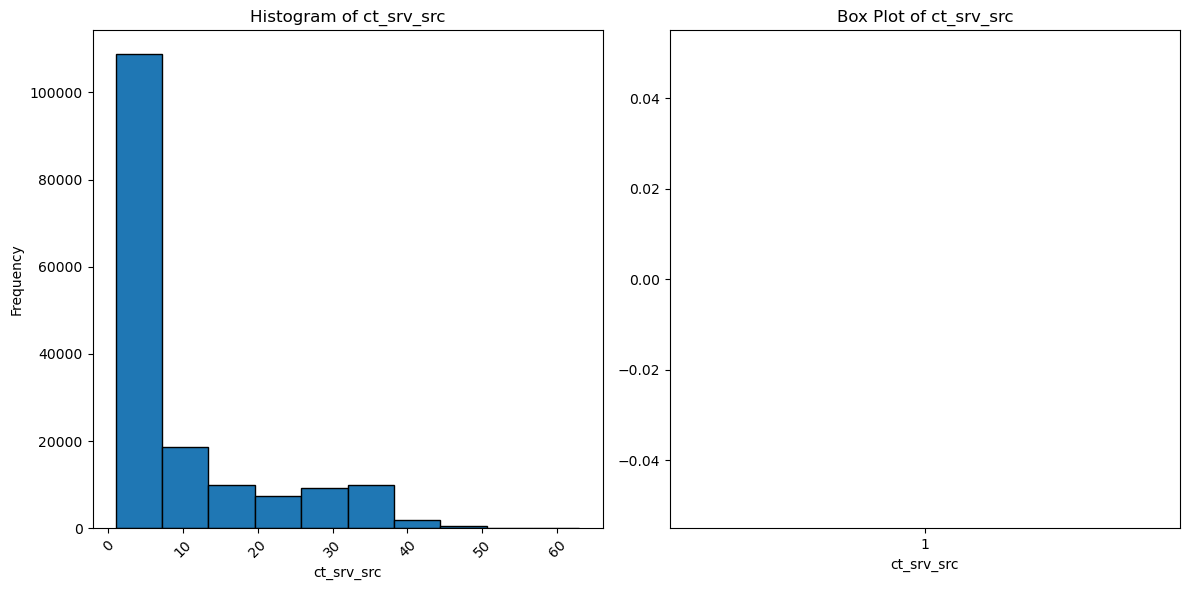

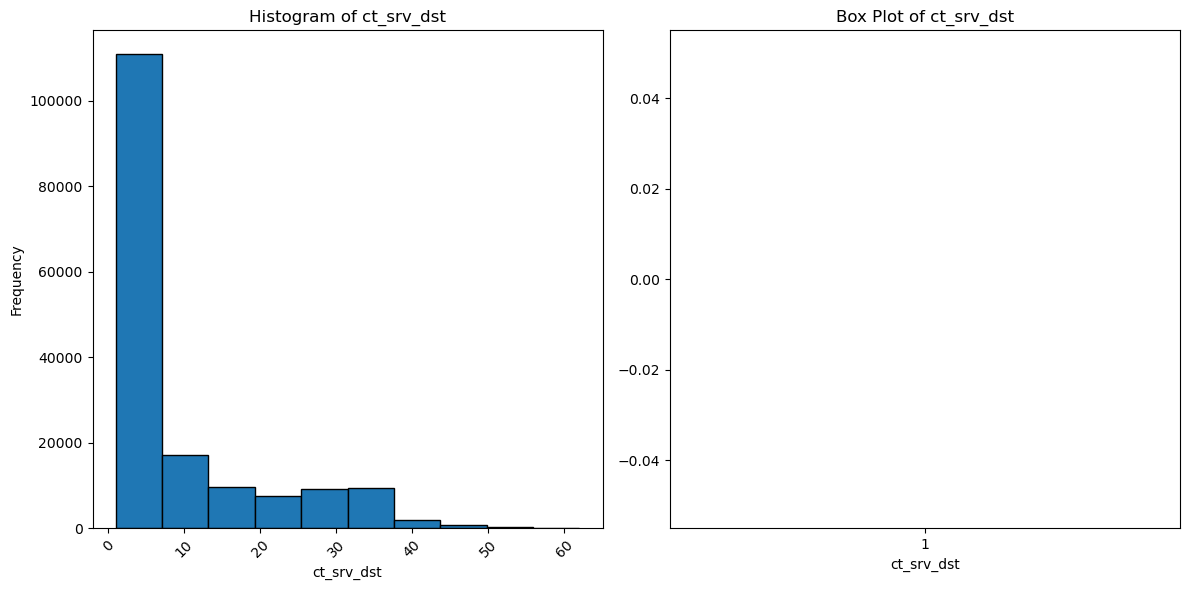

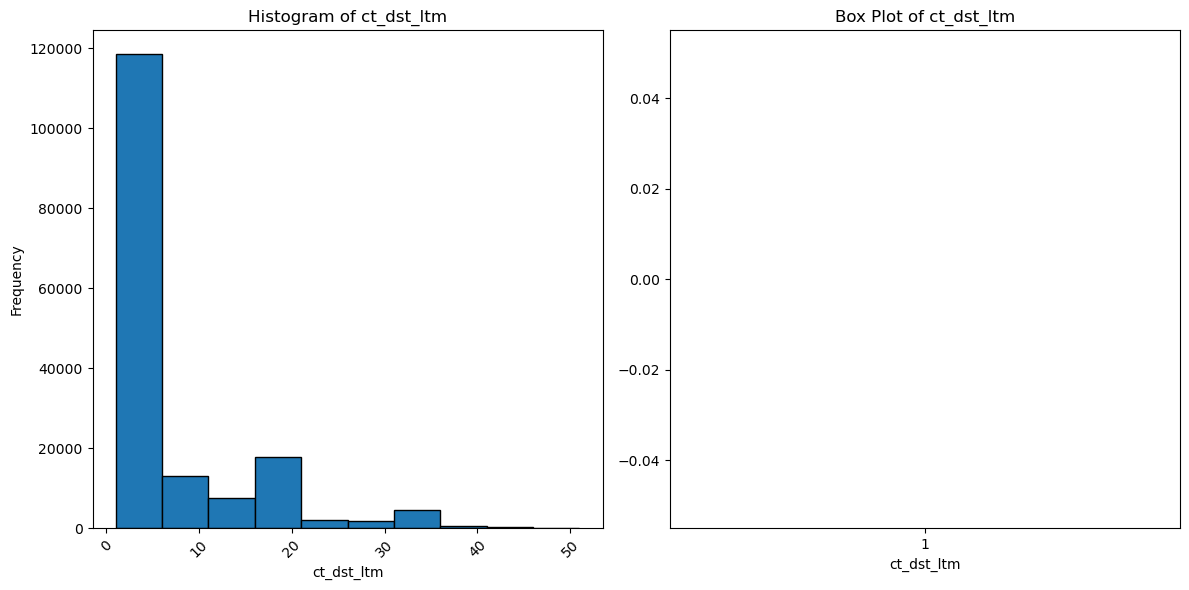

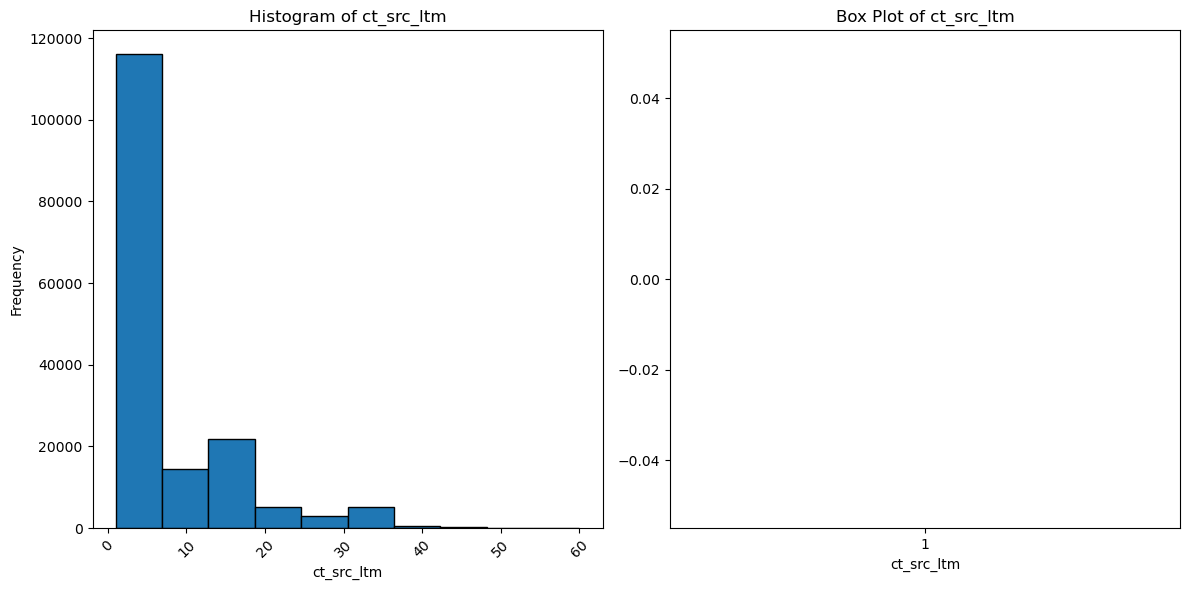

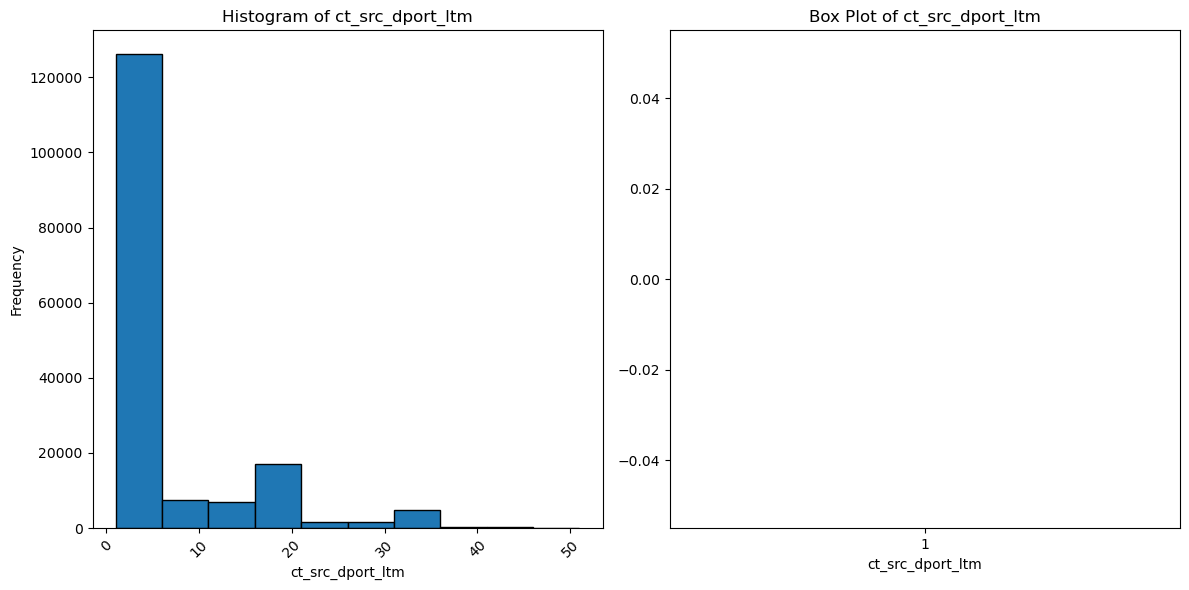

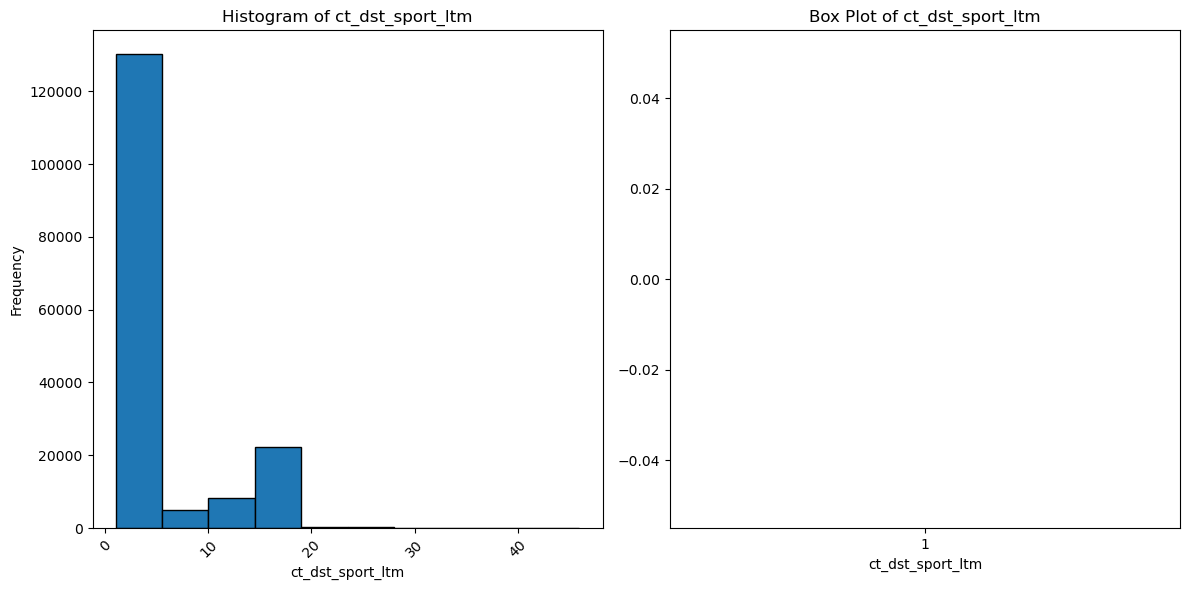

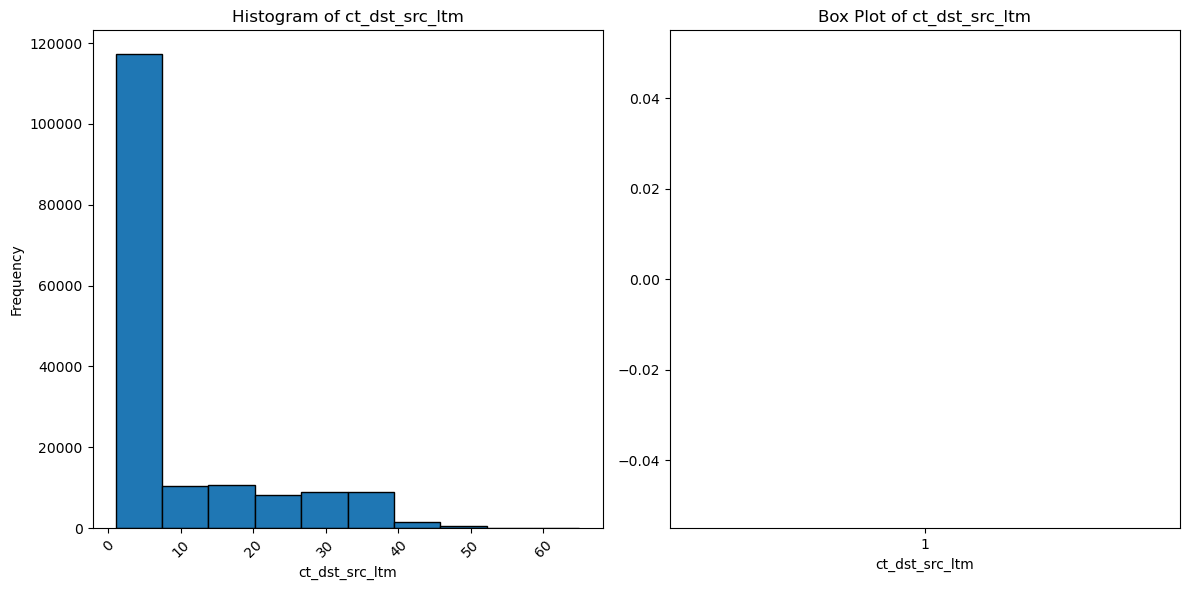

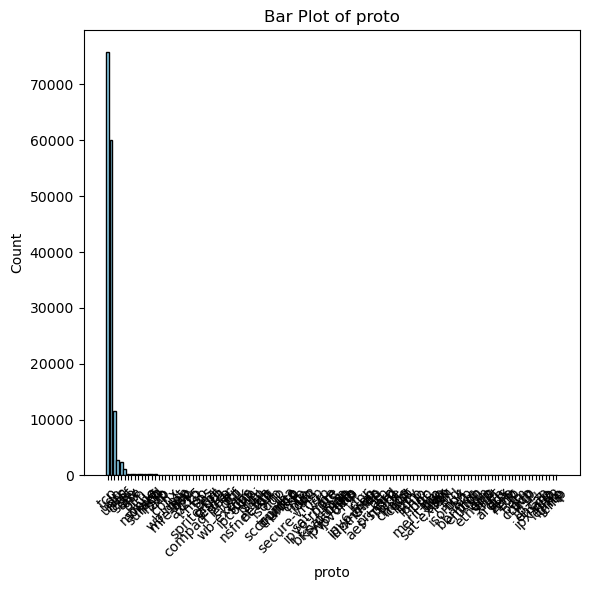

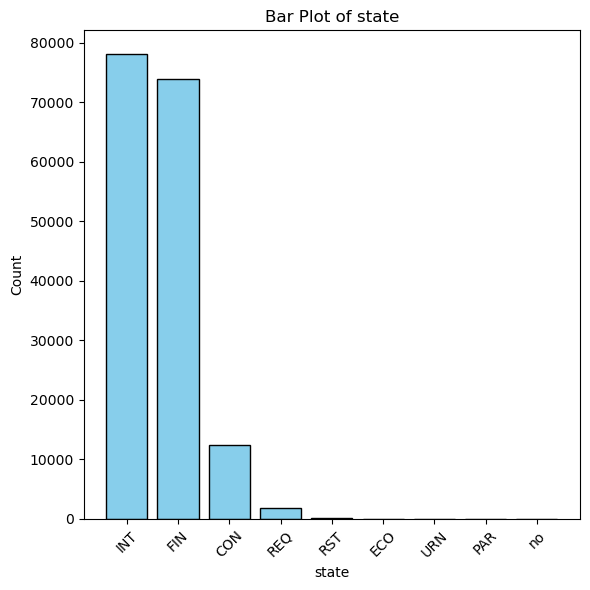

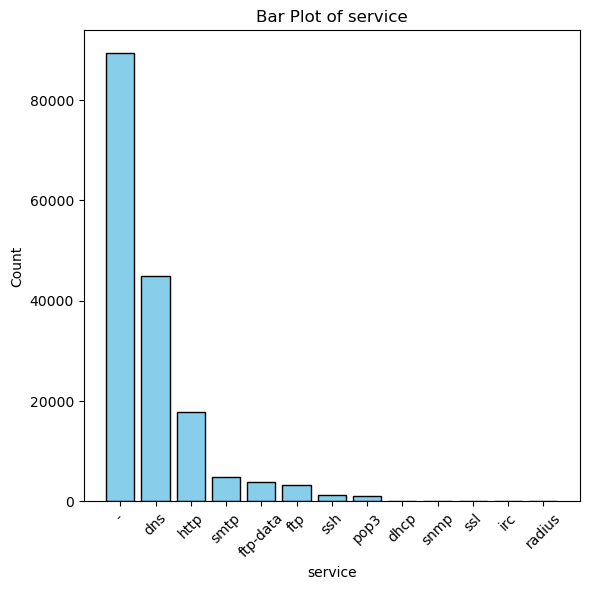

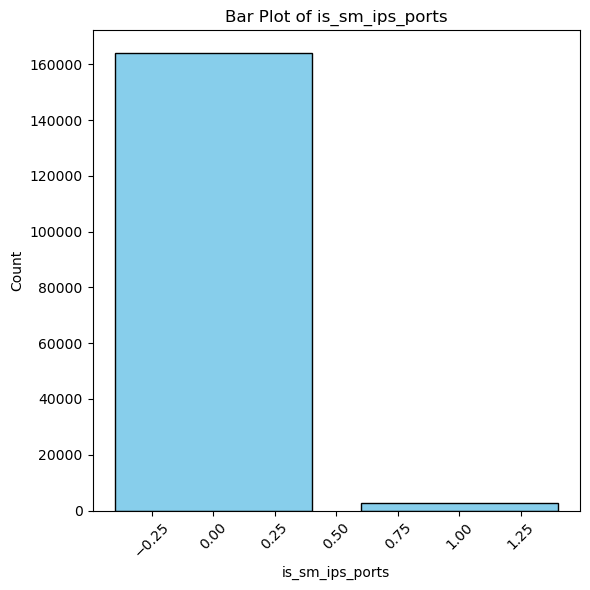

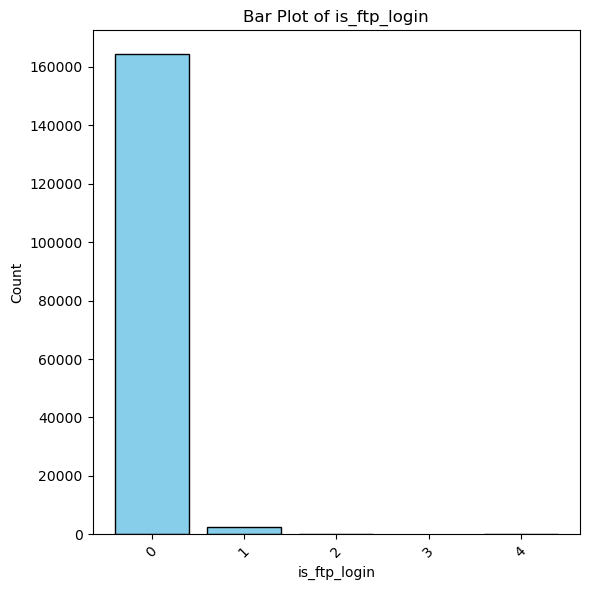

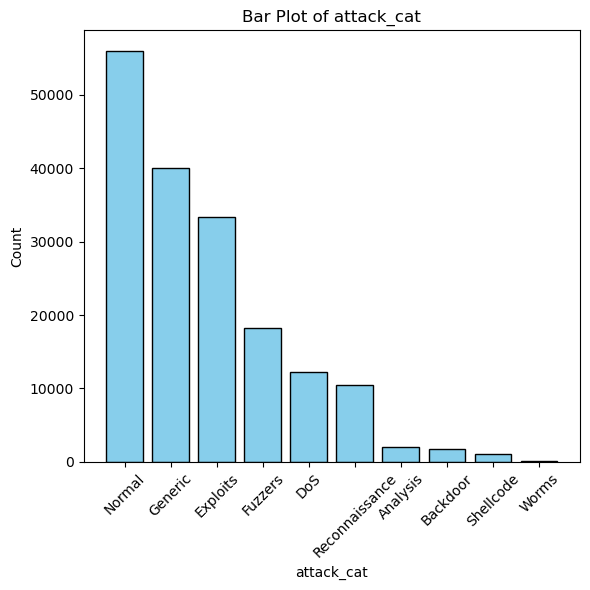

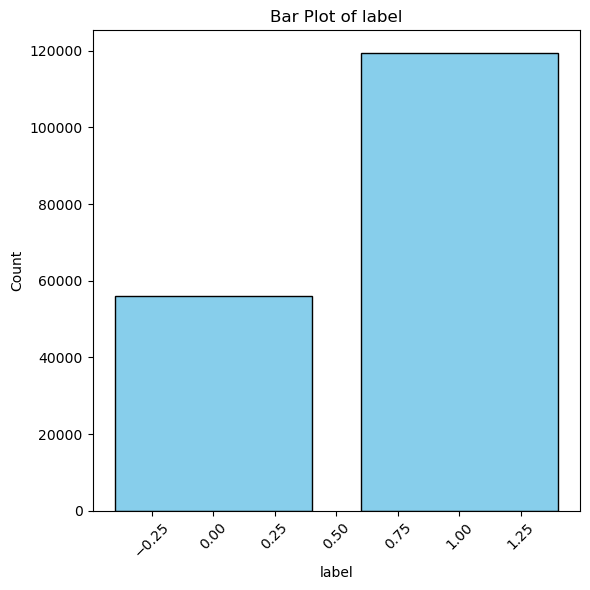

In [45]:
def showHist(ax, column):
    ax.hist(column, bins=10, edgecolor='black')
    ax.tick_params(axis='x', labelrotation=45)
    ax.set_xlabel(column.name)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of {column.name}')

def showBoxPlot(ax, column):
    ax.boxplot(column)
    ax.set_xlabel(column.name)
    ax.set_title(f'Box Plot of {column.name}')

def showBarPlot(ax, column):
    value_counts = column.value_counts()
    ax.bar(value_counts.index, value_counts.values, color='skyblue', edgecolor='black')
    ax.tick_params(axis='x', labelrotation=45)
    ax.set_xlabel(column.name)
    ax.set_ylabel('Count')
    ax.set_title(f'Bar Plot of {column.name}')


for column in numerical_train_data.columns:
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    showHist(axs[0], numerical_train_data[column])
    showBoxPlot(axs[1], numerical_train_data[column])
    plt.tight_layout()  # Adjust subplots to fit into figure area
    plt.show()

for column in categorical_train_data.columns:
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    showBarPlot(ax, categorical_train_data[column])
    plt.tight_layout()
    plt.show()


## Correlation between numerical features

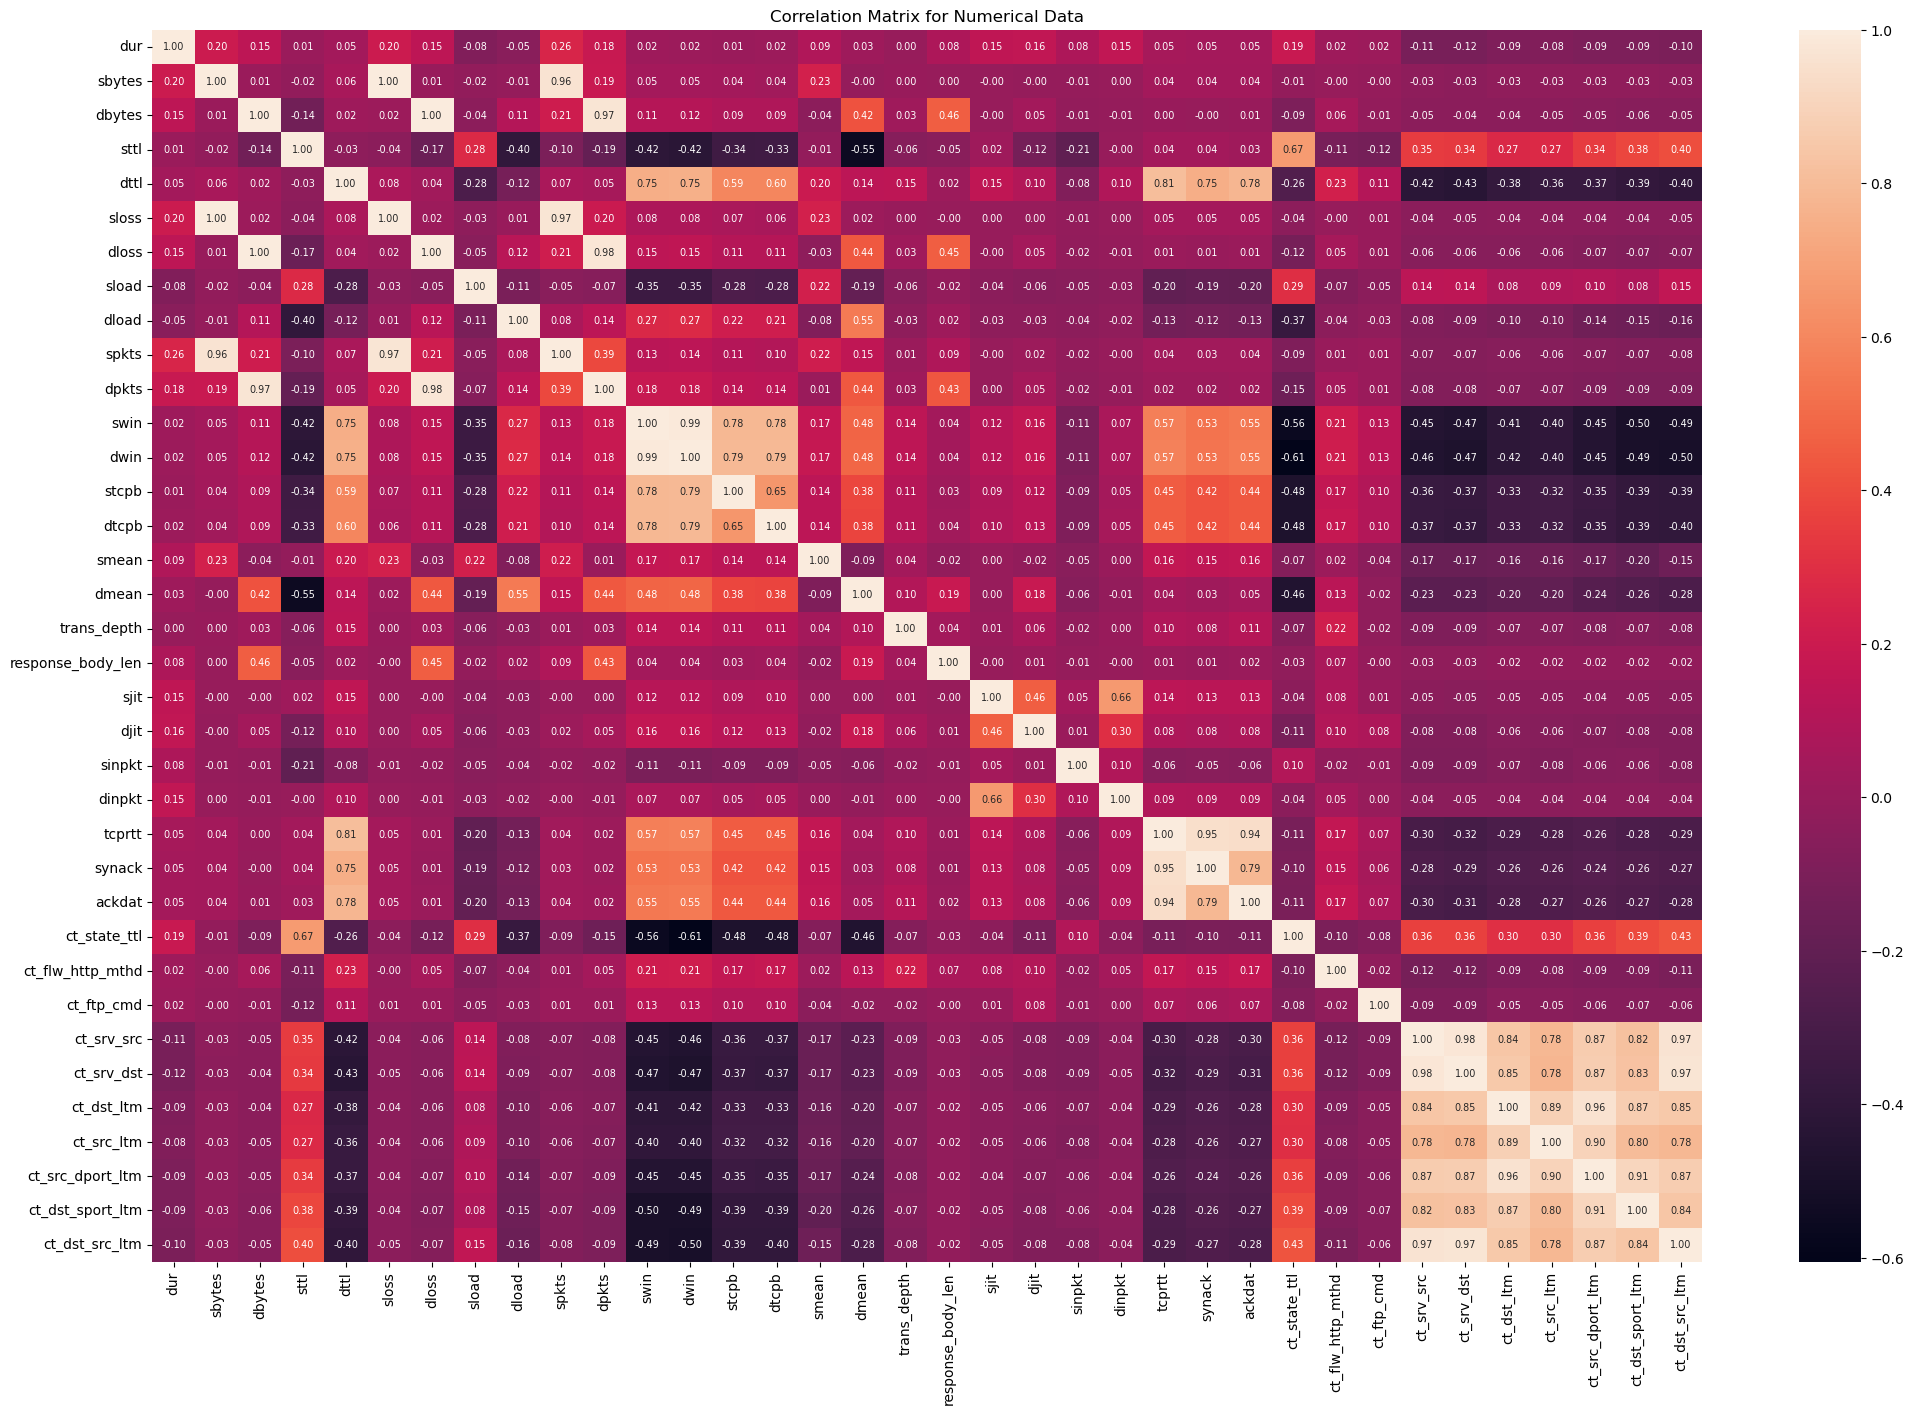

In [46]:
corr_matrix = numerical_train_data.corr()

plt.figure(figsize=(25, 16))
sns.heatmap(corr_matrix, annot=True,annot_kws={'fontsize':'x-small'}, fmt=".2f")
plt.title('Correlation Matrix for Numerical Data')
plt.show()

# 1. Split Training Set and Validation Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

Note: For training, you should use the data contained in the `train` folder given by the TA. The `test` data is only used for kaggle submission.

In [47]:
# Split training set and validation set here, store into variables train_set and val_set.
# Remember to also keep the original training set before splitting. This will come important later.
# train_set, val_set = ...

from sklearn.model_selection import train_test_split

train_set, val_set = train_test_split(train_data, test_size=0.2, random_state=42)

# 2. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

We will give some common methods for you to try, but you only have to **at least implement one method for each process**. For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

## A. Data Cleaning

**Data cleaning** is the crucial first step in preparing your dataset for machine learning. Raw data collected from various sources is often messy and may contain errors, missing values, and inconsistencies. Data cleaning involves the following steps:

1. **Handling Missing Data:** Identify and address missing values in the dataset. This can include imputing missing values, removing rows or columns with excessive missing data, or using more advanced techniques like interpolation.

2. **Dealing with Outliers:** Identify and handle outliers, which are data points significantly different from the rest of the dataset. Outliers can be removed or transformed to improve model performance.

3. **Data Validation:** Check for data integrity and consistency. Ensure that data types are correct, categorical variables have consistent labels, and numerical values fall within expected ranges.

4. **Removing Duplicates:** Identify and remove duplicate rows, as they can skew the model's training process and evaluation metrics.

5. **Feature Engineering**: Create new features or modify existing ones to extract relevant information. This step can involve scaling, normalizing, or encoding features for better model interpretability.

### I. Remove Duplicates
Handling duplicate values is crucial because they can compromise data integrity, leading to inaccurate analysis and insights. Duplicate entries can bias machine learning models, causing overfitting and reducing their ability to generalize to new data. They also inflate the dataset size unnecessarily, increasing computational costs and processing times. Additionally, duplicates can distort statistical measures and lead to inconsistencies, ultimately affecting the reliability of data-driven decisions and reporting. Ensuring data quality by removing duplicates is essential for accurate, efficient, and consistent analysis.

In [48]:
# Write your code here
train_set = train_set.drop_duplicates(keep="first").reset_index(drop=True)
train_set

val_set = val_set.drop_duplicates(keep="first").reset_index(drop=True)
val_set

test_set = test_data.drop_duplicates(keep="first").reset_index(drop=True)
test_set

,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,...,trans_depth,response_body_len,proto,sjit,djit,sinpkt,dinpkt,tcprtt,synack,ackdat
0,0.0,1.0,0.0,0.0,0.0,5.0,5.0,2.0,2.0,2.0,...,0.0,0.0,tcp,2737.954123,118.833969,48.756556,76.593602,0.165117,0.072001,0.093116
1,0.0,1.0,0.0,NaN,0.0,6.0,6.0,1.0,1.0,1.0,...,0.0,0.0,tcp,2938.299144,165.780563,49.812539,109.557602,0.223604,0.100248,0.123356
2,0.0,1.0,0.0,0.0,0.0,4.0,4.0,1.0,2.0,1.0,...,0.0,0.0,tcp,4287.453629,129.471406,69.765530,94.395906,0.113189,0.082498,0.030691
3,0.0,2.0,0.0,0.0,0.0,10.0,4.0,2.0,4.0,2.0,...,0.0,0.0,udp,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,0.000000
4,NaN,0.0,NaN,0.0,0.0,13.0,11.0,10.0,7.0,6.0,...,0.0,0.0,tcp,1119.063538,26.748141,17.628799,15.543294,0.000655,0.000526,0.000129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20578,0.0,1.0,0.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0,...,0.0,0.0,tcp,1902.551328,143.722203,16.088482,87.730055,0.117474,0.071119,0.046355
20579,0.0,0.0,0.0,0.0,0.0,14.0,7.0,1.0,9.0,1.0,...,0.0,0.0,tcp,858.139465,22.118752,14.832222,13.803000,0.000647,0.000491,0.000156
20580,0.0,2.0,0.0,0.0,0.0,6.0,6.0,NaN,4.0,4.0,...,0.0,0.0,udp,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.000000
20581,0.0,2.0,0.0,0.0,0.0,11.0,11.0,4.0,8.0,4.0,...,0.0,0.0,unas,0.000000,0.000000,0.011000,0.000000,0.000000,0.000000,0.000000


### II. Handling Missing Data

Missing data can adversely affect the performance and accuracy of machine learning models. There are several strategies to handle missing data in machine learning:

1. **Data Imputation:**

    a. **Mean, Median, or Mode Imputation:** For numerical features, you can replace missing values with the mean, median, or mode of the non-missing values in the same feature. This method is simple and often effective when data is missing at random.

    b. **Constant Value Imputation:** You can replace missing values with a predefined constant value (e.g., 0) if it makes sense for your dataset and problem.

    c. **Imputation Using Predictive Models:** More advanced techniques involve using predictive models to estimate missing values. For example, you can train a regression model to predict missing numerical values or a classification model to predict missing categorical values.

2. **Deletion of Missing Data:**

    a. **Listwise Deletion:** In cases where the amount of missing data is relatively small, you can simply remove rows with missing values from your dataset. However, this approach can lead to a loss of valuable information.

    b. **Column (Feature) Deletion:** If a feature has a large number of missing values and is not critical for your analysis, you can consider removing that feature altogether.

3. **Domain-Specific Strategies:**

    a. **Domain Knowledge:** In some cases, domain knowledge can guide the imputation process. For example, if you know that missing values are related to a specific condition, you can impute them accordingly.

4. **Imputation Libraries:**

    a. **Scikit-Learn:** Scikit-Learn provides a `SimpleImputer` class that can handle basic imputation strategies like mean, median, and mode imputation.

    b. **Fancyimpute:** Fancyimpute is a Python library that offers more advanced imputation techniques, including matrix factorization, k-nearest neighbors, and deep learning-based methods.

The choice of imputation method should be guided by the nature of your data, the amount of missing data, the problem you are trying to solve, and the assumptions you are willing to make.

In [49]:
from scipy.stats import skew

def Imputer(data_set, numerical_data, categorical_data):
  numeric_cols = numerical_data.columns
  categorical_cols = categorical_data.columns

  # Imputasi untuk kolom kategorikal (gunakan mode)
  for col in categorical_cols:
      mode_value = data_set[col].mode()[0]
      data_set.fillna({col: mode_value}, inplace=True)

  # Imputasi untuk kolom numerikal
  for col in numeric_cols:
      # Periksa skewness kolom
      skewness = skew(data_set[col].dropna())  # Menghitung skewness tanpa missing value

      # Jika skewness lebih dari 0.5, dianggap tinggi skewed, gunakan median
      # Jika skewness kurang dari 0.5, dianggap rendah skewed, gunakan mean
      if abs(skewness) > 0.5:
          median_value = data_set[col].median()
          data_set.fillna({col: median_value}, inplace=True)
      else:
          mean_value = data_set[col].mean()
          data_set.fillna({col: mean_value}, inplace=True)

  return data_set

In [50]:
# Menghitung jumlah missing values pada train_set
train_missing_values = train_set.isnull().sum()

# Menghitung jumlah missing values pada val_set
val_missing_values = val_set.isnull().sum()

# # Menghitung jumlah missing values pada test_set
# test_missing_values = test_set.isnull().sum()

# Menampilkan missing values pada train_set dan val_set
print("Missing Values in Train Set:")
print(train_missing_values)

print("\nMissing Values in Validation Set:")
print(val_missing_values)

# print("\nMissing Values in Testing Set:")
# print(test_missing_values)

Missing Values in Train Set:
proto                7012
state                7025
dur                  6928
sbytes               6819
dbytes               7047
sttl                 6997
dttl                 6910
sloss                6975
dloss                7193
service              7017
sload                6987
dload                7076
spkts                6932
dpkts                6887
swin                 6942
dwin                 6976
stcpb                6917
dtcpb                7049
smean                6990
dmean                7060
trans_depth          6972
response_body_len    6975
sjit                 6985
djit                 7088
sinpkt               6925
dinpkt               6972
tcprtt               7071
synack               6920
ackdat               6867
is_sm_ips_ports      7005
ct_state_ttl         6974
ct_flw_http_mthd     6927
is_ftp_login         6901
ct_ftp_cmd           7036
ct_srv_src           7077
ct_srv_dst           6990
ct_dst_ltm           6978
ct_src_lt

In [51]:
train_set = Imputer(train_set, numerical_train_data, categorical_train_data)

# Cek hasilnya
print(train_set.isnull().sum())  # Mengecek apakah masih ada missing value

proto                0
state                0
dur                  0
sbytes               0
dbytes               0
sttl                 0
dttl                 0
sloss                0
dloss                0
service              0
sload                0
dload                0
spkts                0
dpkts                0
swin                 0
dwin                 0
stcpb                0
dtcpb                0
smean                0
dmean                0
trans_depth          0
response_body_len    0
sjit                 0
djit                 0
sinpkt               0
dinpkt               0
tcprtt               0
synack               0
ackdat               0
is_sm_ips_ports      0
ct_state_ttl         0
ct_flw_http_mthd     0
is_ftp_login         0
ct_ftp_cmd           0
ct_srv_src           0
ct_srv_dst           0
ct_dst_ltm           0
ct_src_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
attack_cat           0
label                0
dtype: int6

In [52]:
val_set = Imputer(val_set, numerical_train_data, categorical_train_data)

# Cek hasilnya
print(val_set.isnull().sum())  # Mengecek apakah masih ada missing value

proto                0
state                0
dur                  0
sbytes               0
dbytes               0
sttl                 0
dttl                 0
sloss                0
dloss                0
service              0
sload                0
dload                0
spkts                0
dpkts                0
swin                 0
dwin                 0
stcpb                0
dtcpb                0
smean                0
dmean                0
trans_depth          0
response_body_len    0
sjit                 0
djit                 0
sinpkt               0
dinpkt               0
tcprtt               0
synack               0
ackdat               0
is_sm_ips_ports      0
ct_state_ttl         0
ct_flw_http_mthd     0
is_ftp_login         0
ct_ftp_cmd           0
ct_srv_src           0
ct_srv_dst           0
ct_dst_ltm           0
ct_src_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
attack_cat           0
label                0
dtype: int6

In [53]:
test_set = Imputer(test_set, numerical_test_data, categorical_test_data)

# Cek hasilnya
print(test_set.isnull().sum())  # Mengecek apakah masih ada missing value

is_sm_ips_ports      0
ct_state_ttl         0
ct_flw_http_mthd     0
is_ftp_login         0
ct_ftp_cmd           0
ct_srv_src           0
ct_srv_dst           0
ct_dst_ltm           0
ct_src_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
id                   0
state                0
dur                  0
sbytes               0
dbytes               0
sttl                 0
dttl                 0
sloss                0
dloss                0
service              0
sload                0
dload                0
spkts                0
dpkts                0
swin                 0
dwin                 0
stcpb                0
dtcpb                0
smean                0
dmean                0
trans_depth          0
response_body_len    0
proto                0
sjit                 0
djit                 0
sinpkt               0
dinpkt               0
tcprtt               0
synack               0
ackdat               0
dtype: int64


### III. Dealing with Outliers

Outliers are data points that significantly differ from the majority of the data. They can be unusually high or low values that do not fit the pattern of the rest of the dataset. Outliers can significantly impact model performance, so it is important to handle them properly.

Some methods to handle outliers:
1. **Imputation**: Replace with mean, median, or a boundary value.
2. **Clipping**: Cap values to upper and lower limits.
3. **Transformation**: Use log, square root, or power transformations to reduce their influence.
4. **Model-Based**: Use algorithms robust to outliers (e.g., tree-based models, Huber regression).

In [55]:
# Mendapatkan daftar kolom numerik
numerical_train_set = train_set.select_dtypes(include=['number']).columns.tolist()

In [56]:
# Deteksi outliers dengan menggunakan IQR
def detect_outliers(df, cols, iqr_factor=1.5):
    outliers = {}
    # Pastikan hanya kolom numerik yang digunakan
    df_numeric = df[cols].apply(pd.to_numeric, errors='coerce')

    # Perhitungan IQR (Interquartile Range)
    Q1 = df_numeric.quantile(0.25)
    Q3 = df_numeric.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - iqr_factor * IQR
    upper_bound = Q3 + iqr_factor * IQR

    # Deteksi outliers per kolom
    for col in cols:
        outliers[col] = {
            'lower_bound': lower_bound[col],
            'upper_bound': upper_bound[col],
            'outliers': df_numeric[col][(df_numeric[col] < lower_bound[col]) | (df_numeric[col] > upper_bound[col])].count()
        }

    return outliers

# Deteksi kolom yang skewed (distribusi asimetris)
def detect_skewed_cols(df, cols, skew_threshold=0.5):
    skewness = df[cols].skew()
    skewed_cols = skewness[skewness > skew_threshold]
    return skewed_cols

# Menentukan kolom yang perlu diclip
def detect_clip_cols(df, cols, lower_percentile=0.01, upper_percentile=0.99):
    lower_limits = df[cols].quantile(lower_percentile)
    upper_limits = df[cols].quantile(upper_percentile)

    clip_cols = {}
    for col in cols:
        clip_cols[col] = {
            'lower_limit': lower_limits[col],
            'upper_limit': upper_limits[col],
            'outliers': df[col][(df[col] < lower_limits[col]) | (df[col] > upper_limits[col])].count()
        }
    return clip_cols

# Fungsi utama untuk memisahkan kolom yang perlu diimputasi, ditransformasi, atau diclip
def auto_handle_outliers(data_set, numerical_cols):
    """
    Otomatis memisahkan kolom-kolom yang perlu diimputasi, ditransformasi, atau diclip.
    """
    # Deteksi Outliers untuk Imputasi
    outliers = detect_outliers(data_set, numerical_cols)
    cols_to_impute = [col for col, stats in outliers.items() if stats['outliers'] > 0]

    # Deteksi Kolom yang Skewed untuk Transformasi
    skewed_cols = detect_skewed_cols(data_set, numerical_cols)
    cols_to_transform = skewed_cols.index.tolist()

    # Deteksi Kolom untuk Clipping
    clip_cols = detect_clip_cols(data_set, numerical_cols)
    cols_to_clip = [col for col, stats in clip_cols.items() if stats['outliers'] > 0]

    # Menampilkan hasil pemisahan kolom
    print("Kolom untuk Imputasi:", cols_to_impute)
    print("Kolom untuk Transformasi (Skewed):", cols_to_transform)
    print("Kolom untuk Clipping:", cols_to_clip)

    return cols_to_impute, cols_to_transform, cols_to_clip

cols_to_impute, cols_to_transform, cols_to_clip = auto_handle_outliers(train_set, numerical_train_set)

Kolom untuk Imputasi: ['dur', 'sbytes', 'dbytes', 'sloss', 'dloss', 'sload', 'dload', 'spkts', 'dpkts', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'sjit', 'djit', 'sinpkt', 'dinpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm']
Kolom untuk Transformasi (Skewed): ['dur', 'sbytes', 'dbytes', 'dttl', 'sloss', 'dloss', 'sload', 'dload', 'spkts', 'dpkts', 'stcpb', 'dtcpb', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'sjit', 'djit', 'sinpkt', 'dinpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm']
Kolom untuk Clipping: ['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'sload', 'dload', 'spkts', 'dpk

In [59]:
# Karena ada kolom yang muncul untuk beberapa metode outlier handling, urutannya
# imputasi -> transform, imputasi->clipping, transform -> clipping
from sklearn.impute import SimpleImputer

# 1. Imputasi untuk semua kolom yang perlu diimputasi
imputer = SimpleImputer(strategy='median')
train_set[cols_to_impute] = imputer.fit_transform(train_set[cols_to_impute])
val_set[cols_to_impute] = imputer.fit_transform(val_set[cols_to_impute])
test_set[cols_to_impute] = imputer.fit_transform(test_set[cols_to_impute])

# 2. Transformasi untuk semua kolom yang perlu ditransformasi
# Misalnya kita menggunakan log transform untuk kolom yang skewed
for col in cols_to_transform:
    # Pastikan hanya kolom dengan nilai positif (log transform tidak bisa diterapkan pada nilai negatif)
    train_set[col] = np.log1p(train_set[col])
    val_set[col] = np.log1p(val_set[col])
    test_set[col] = np.log1p(test_set[col])

# 3. Clipping untuk semua kolom yang perlu di-clip
for col in cols_to_clip:
    lower_limit = train_set[col].quantile(0.01)
    upper_limit = train_set[col].quantile(0.99)
    train_set[col] = train_set[col].clip(lower=lower_limit, upper=upper_limit)
    val_set[col] = val_set[col].clip(lower=lower_limit, upper=upper_limit)
    test_set[col] = test_set[col].clip(lower=lower_limit, upper=upper_limit)

In [26]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import scipy.stats as stats
# from scipy.stats import shapiro, anderson, normaltest

# # Pilih kolom numerik
# numerical_columns = train_data_combined.select_dtypes(include=['float64', 'int64']).columns

# # Loop untuk mengecek normalitas untuk setiap kolom numerik
# for column in numerical_columns:
#     print(f'Checking normality for column: {column}')

#     # 1. Visualisasi - Histogram
#     plt.figure(figsize=(12, 6))
#     sns.histplot(train_data_combined[column], kde=True, bins=30)
#     plt.title(f'Histogram of {column}')
#     plt.show()

#     # Q-Q Plot
#     plt.figure(figsize=(6, 6))
#     stats.probplot(train_data_combined[column], dist="norm", plot=plt)
#     plt.title(f'Q-Q Plot of {column}')
#     plt.show()

#     # 2. Uji Normalitas - Shapiro-Wilk Test
#     stat, p_value = shapiro(train_data_combined[column])
#     print(f'Shapiro-Wilk Test: statistic = {stat}, p-value = {p_value}')
#     if p_value > 0.05:
#         print(f'{column} terdistribusi normal (Gagal menolak H0)')
#     else:
#         print(f'{column} tidak terdistribusi normal (Menolak H0)')

#     # 3. Uji Normalitas - Anderson-Darling Test
#     result = anderson(train_data_combined[column])
#     print(f'Anderson-Darling Test statistic = {result.statistic}')
#     for i in range(len(result.critical_values)):
#         sl = result.significance_level[i]
#         cv = result.critical_values[i]
#         if result.statistic > cv:
#             print(f'Pada tingkat signifikansi {sl}%, {column} tidak terdistribusi normal')
#         else:
#             print(f'Pada tingkat signifikansi {sl}%, {column} terdistribusi normal')

#     # 4. Uji Normalitas - D'Agostino's K-squared Test
#     stat, p_value = normaltest(train_data_combined[column])
#     print(f'D\'Agostino\'s K-squared Test: statistic = {stat}, p-value = {p_value}')
#     if p_value > 0.05:
#         print(f'{column} terdistribusi normal (Gagal menolak H0)')
#     else:
#         print(f'{column} tidak terdistribusi normal (Menolak H0)')

#     print('\n' + '-'*50 + '\n')


## B. Data Preprocessing

**Data preprocessing** is a broader step that encompasses both data cleaning and additional transformations to make the data suitable for machine learning algorithms. Its primary goals are:

1. **Feature Scaling:** Ensure that numerical features have similar scales. Common techniques include Min-Max scaling (scaling to a specific range) or standardization (mean-centered, unit variance).

2. **Encoding Categorical Variables:** Machine learning models typically work with numerical data, so categorical variables need to be encoded. This can be done using one-hot encoding, label encoding, or more advanced methods like target encoding.

3. **Handling Imbalanced Classes:** If dealing with imbalanced classes in a binary classification task, apply techniques such as oversampling, undersampling, or using different evaluation metrics to address class imbalance.

4. **Dimensionality Reduction:** Reduce the number of features using techniques like Principal Component Analysis (PCA) or feature selection to simplify the model and potentially improve its performance.

5. **Normalization:** Normalize data to achieve a standard distribution. This is particularly important for algorithms that assume normally distributed data.

### Notes on Preprocessing processes

It is advised to create functions or classes that have the same/similar type of inputs and outputs, so you can add, remove, or swap the order of the processes easily. You can implement the functions or classes by yourself

or

use `sklearn` library. To create a new preprocessing component in `sklearn`, implement a corresponding class that includes:
1. Inheritance to `BaseEstimator` and `TransformerMixin`
2. The method `fit`
3. The method `transform`

In [27]:
# Example

# from sklearn.base import BaseEstimator, TransformerMixin

# class FeatureEncoder(BaseEstimator, TransformerMixin):

#     def fit(self, X, y=None):

#         # Fit the encoder here

#         return self

#     def transform(self, X):
#         X_encoded = X.copy()

#         # Encode the categorical variables here

#         return X_encoded

### I. Feature Scaling

**Feature scaling** is a preprocessing technique used in machine learning to standardize the range of independent variables or features of data. The primary goal of feature scaling is to ensure that all features contribute equally to the training process and that machine learning algorithms can work effectively with the data.

Here are the main reasons why feature scaling is important:

1. **Algorithm Sensitivity:** Many machine learning algorithms are sensitive to the scale of input features. If the scales of features are significantly different, some algorithms may perform poorly or take much longer to converge.

2. **Distance-Based Algorithms:** Algorithms that rely on distances or similarities between data points, such as k-nearest neighbors (KNN) and support vector machines (SVM), can be influenced by feature scales. Features with larger scales may dominate the distance calculations.

3. **Regularization:** Regularization techniques, like L1 (Lasso) and L2 (Ridge) regularization, add penalty terms based on feature coefficients. Scaling ensures that all features are treated equally in the regularization process.

Common methods for feature scaling include:

1. **Min-Max Scaling (Normalization):** This method scales features to a specific range, typically [0, 1]. It's done using the following formula:

   $$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$$

   - Here, $X$ is the original feature value, $X_{min}$ is the minimum value of the feature, and $X_{max}$ is the maximum value of the feature.  
<br />
<br />
2. **Standardization (Z-score Scaling):** This method scales features to have a mean (average) of 0 and a standard deviation of 1. It's done using the following formula:

   $$X' = \frac{X - \mu}{\sigma}$$

   - $X$ is the original feature value, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.  
<br />
<br />
3. **Robust Scaling:** Robust scaling is a method that scales features to the interquartile range (IQR) and is less affected by outliers. It's calculated as:

   $$X' = \frac{X - Q1}{Q3 - Q1}$$

   - $X$ is the original feature value, $Q1$ is the first quartile (25th percentile), and $Q3$ is the third quartile (75th percentile) of the feature.  
<br />
<br />
4. **Log Transformation:** In cases where data is highly skewed or has a heavy-tailed distribution, taking the logarithm of the feature values can help stabilize the variance and improve scaling.

The choice of scaling method depends on the characteristics of your data and the requirements of your machine learning algorithm. **Min-max scaling and standardization are the most commonly used techniques and work well for many datasets.**

Scaling should be applied separately to each training and test set to prevent data leakage from the test set into the training set. Additionally, **some algorithms may not require feature scaling, particularly tree-based models.**

In [60]:
X_train = train_set.drop(['attack_cat', 'label'], axis=1)
y_train = train_set[['attack_cat']]

X_val = val_set.drop(['attack_cat', 'label'], axis=1)
y_val = val_set[['attack_cat']]

X_test_raw = test_set

# Pisahkan data kategorikal dan numerikal
X_train_categorical = X_train[categorical_train_data.columns[:-2]]
X_val_categorical = X_val[categorical_train_data.columns[:-2]]
X_test_categorical = X_test_raw[categorical_test_data.columns]

X_train_numerical = X_train[numerical_train_data.columns]
X_val_numerical = X_val[numerical_train_data.columns]
X_test_numerical = X_test_raw[numerical_test_data.columns]

In [62]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler

class FeatureScaling(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.scaler_ = MinMaxScaler()

        self.scaler_.fit(X)

        return self

    def transform(self, X):
        X_scaled = self.scaler_.transform(X)

        return X_scaled


In [63]:
scaler = FeatureScaling()
scaler = scaler.fit(X_train_numerical)

X_train_numerical_scaled = scaler.transform(X_train_numerical)
X_val_numerical_scaled = scaler.transform(X_val_numerical)

# Ubah hasil standar scaler ke DataFrame
X_train_numerical_scaled_df = pd.DataFrame(X_train_numerical_scaled, columns=X_train_numerical.columns)
X_val_numerical_scaled_df = pd.DataFrame(X_val_numerical_scaled, columns=X_val_numerical.columns)

### II. Feature Encoding

**Feature encoding**, also known as **categorical encoding**, is the process of converting categorical data (non-numeric data) into a numerical format so that it can be used as input for machine learning algorithms. Most machine learning models require numerical data for training and prediction, so feature encoding is a critical step in data preprocessing.

Categorical data can take various forms, including:

1. **Nominal Data:** Categories with no intrinsic order, like colors or country names.  

2. **Ordinal Data:** Categories with a meaningful order but not necessarily equidistant, like education levels (e.g., "high school," "bachelor's," "master's").

There are several common methods for encoding categorical data:

1. **Label Encoding:**

   - Label encoding assigns a unique integer to each category in a feature.
   - It's suitable for ordinal data where there's a clear order among categories.
   - For example, if you have an "education" feature with values "high school," "bachelor's," and "master's," you can encode them as 0, 1, and 2, respectively.
<br />
<br />
2. **One-Hot Encoding:**

   - One-hot encoding creates a binary (0 or 1) column for each category in a nominal feature.
   - It's suitable for nominal data where there's no inherent order among categories.
   - Each category becomes a new feature, and the presence (1) or absence (0) of a category is indicated for each row.
<br />
<br />
3. **Target Encoding (Mean Encoding):**

   - Target encoding replaces each category with the mean of the target variable for that category.
   - It's often used for classification problems.

In [92]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

class FeatureEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, handle_unknown="ignore"):
        self.handle_unknown = handle_unknown


    def fit(self, X, y=None):
        self.encoder_ = OneHotEncoder(
            handle_unknown=self.handle_unknown
        )
        self.encoder_.fit(X)
        return self

    def transform(self, X):
        X_encoded = self.encoder_.transform(X)
        return X_encoded

    def get_feature_names_out(self, input_features=None):
        return self.encoder_.get_feature_names_out(input_features)


In [97]:
# Initialize the encoder
encoder = FeatureEncoder()

# Fit the encoder on the training data
encoder.fit(X_train_categorical)

# Transform the data
X_train_categorical_encoded = encoder.transform(X_train_categorical)
X_val_categorical_encoded = encoder.transform(X_val_categorical)


print(X_train_categorical.columns)
print(X_val_categorical.columns)

print(X_train_categorical.shape)
print(X_train_categorical_encoded.shape)
print(X_val_categorical_encoded.shape)





Index(['proto', 'state', 'service', 'is_sm_ips_ports', 'is_ftp_login'], dtype='object')
Index(['proto', 'state', 'service', 'is_sm_ips_ports', 'is_ftp_login'], dtype='object')
(136255, 5)
(136255, 158)
(34661, 158)


In [ ]:

# Convert the results to DataFrames with appropriate column names
X_train_categorical_encoded_df = pd.DataFrame(
    X_train_categorical_encoded,
    columns=encoder.get_feature_names_out(X_train_categorical.columns)
)
X_val_categorical_encoded_df = pd.DataFrame(
    X_val_categorical_encoded,
    columns=encoder.get_feature_names_out(X_val_categorical.columns)
)
# Uncomment if test data is needed
# X_test_categorical_encoded_df = pd.DataFrame(
#     X_test_categorical_encoded,
#     columns=encoder.get_feature_names_out(X_test_categorical.columns)
# )

# Print results to verify
print(X_train_categorical_encoded_df.head())
print(X_val_categorical_encoded_df.head())
# Uncomment if test data is needed
# print(X_test_categorical_encoded_df.head())


In [23]:
# Gabungkan fitur numerikal yang sudah diskalakan dan fitur kategorikal yang sudah di-encode
X_train_combined = np.concatenate((X_train_numerical_scaled_df.values, X_train_categorical_encoded_df.values), axis=1)
X_val_combined = np.concatenate((X_val_numerical_scaled_df.values, X_val_categorical_encoded_df.values), axis=1)
#X_test_combined = np.concatenate((X_test_numerical_scaled_df.values, X_test_categorical_encoded_df.values), axis=1)

# Ubah hasil gabungan ke dalam DataFrame dan beri nama kolom
X_train = pd.DataFrame(X_train_combined, columns=np.concatenate([X_train_numerical_scaled_df.columns, encoder.scaler_.get_feature_names_out(X_train_categorical.columns)]))
X_val = pd.DataFrame(X_val_combined, columns=np.concatenate([X_val_numerical_scaled_df.columns, encoder.scaler_.get_feature_names_out(X_val_categorical.columns)]))
#X_test = pd.DataFrame(X_test_combined, columns=np.concatenate([X_test_numerical_scaled_df.columns, encoder.get_feature_names_out(X_test_categorical.columns)]))

In [ ]:
y_train = y_train.values.reshape(-1,)
y_val = y_val.values.reshape(-1,)
y_train

### III. Feature Engineering

**Feature engineering** involves creating new features (input variables) or transforming existing ones to improve the performance of machine learning models. Feature engineering aims to enhance the model's ability to learn patterns and make accurate predictions from the data. It's often said that "good features make good models."

1. **Feature Selection:** Feature engineering can involve selecting the most relevant and informative features from the dataset. Removing irrelevant or redundant features not only simplifies the model but also reduces the risk of overfitting.

2. **Creating New Features:** Sometimes, the existing features may not capture the underlying patterns effectively. In such cases, engineers create new features that provide additional information. For example:
   
   - **Polynomial Features:** Engineers may create new features by taking the square, cube, or other higher-order terms of existing numerical features. This can help capture nonlinear relationships.
   
   - **Interaction Features:** Interaction features are created by combining two or more existing features. For example, if you have features "length" and "width," you can create an "area" feature by multiplying them.

3. **Binning or Discretization:** Continuous numerical features can be divided into bins or categories. For instance, age values can be grouped into bins like "child," "adult," and "senior."

4. **Domain-Specific Feature Engineering:** Depending on the domain and problem, engineers may create domain-specific features. For example, in fraud detection, features related to transaction history and user behavior may be engineered to identify anomalies.

Feature engineering is both a creative and iterative process. It requires a deep understanding of the data, domain knowledge, and experimentation to determine which features will enhance the model's predictive power.

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression


class FeatureEngineering(BaseEstimator, TransformerMixin):

  def __init__(self, corr_threshold=0.9, rf_threshold="mean", lasso_penalty="l1"):
    self.corr_threshold = corr_threshold
    self.rf_threshold = rf_threshold
    self.lasso_penalty = lasso_penalty
    self.selected_features = None

  def fit(self,x,y=None):

    #Corr Feature Removal
    corr_matrix = x.corr()
    to_drop = set()

    for i in range(len(corr_matrix.columns)):
      for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > self.corr_threshold:
          colname = corr_matrix.columns[i]
          to_drop.add(colname)

    x = x.drop(columns=to_drop)

    #RF Feature Selection
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(x, y)

    feature_importance = rf.feature_importances_

    selector = SelectFromModel(rf, threshold=self.rf_threshold)
    rf_selected_features = x.columns[selector.get_support()]

    #Lasso Feature Selection
    lasso = LogisticRegression(penalty=self.lasso_penalty, solver='liblinear')
    lasso.fit(x, y)
    lasso_coef = pd.Series(lasso.coef_[0], index=x.columns)
    lasso_selected_features = lasso_coef[lasso_coef != 0].index

    #Combine selected fefatures
    self.selected_features = list(set(rf_selected_features) & set(lasso_selected_features))

    #Remove features with neg lasso coef
    for feature in lasso_coef[lasso_coef < 0].index:
            if feature in feature_select:
                feature_select.remove(feature)

    self.selected_features = feature_select

    return self

  def transform(self, x):
    return x[self.selected_features]



In [ ]:
FE = FeatureEngineering()

X_train_filtered = FE.fit_transform(X_train,y_train)
X_val_filtered = FE.transform(X_val)

In [ ]:
import numpy as np

# Tentukan threshold untuk korelasi tinggi
threshold = 0.9

# Menghitung korelasi antar fitur
corr_matrix = X_train.corr()

# Membuat list untuk fitur yang akan dihapus
to_drop = set()

# Menyaring korelasi yang lebih besar dari threshold
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:  # jika korelasi tinggi
            colname = corr_matrix.columns[i]  # nama fitur yang akan dihapus
            to_drop.add(colname)

# Hapus fitur yang terkorelasi tinggi
X_train = X_train.drop(columns=to_drop)
X_val = X_val.drop(columns=to_drop)

# print(f"Fitur yang dihapus: {to_drop}")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Inisialisasi Random Forest dan latih model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Ambil feature importance
feature_importance = rf.feature_importances_

# Menampilkan feature importance
features = X_train.columns
importance_df = pd.DataFrame({'feature': features, 'importance': feature_importance})
importance_df = importance_df.sort_values(by='importance', ascending=False)

# Pilih fitur berdasarkan batasan threshold
threshold = 0.01  # Pilih batasan importance, misalnya 5%
important_features_rf = importance_df[importance_df['importance'] > threshold]

# print(important_features_rf)

In [ ]:
from sklearn.feature_selection import SelectFromModel

# Inisialisasi model dan latih
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Gunakan SelectFromModel untuk memilih fitur penting
selector = SelectFromModel(rf, threshold="mean")  # threshold bisa diubah sesuai kebutuhan
X_train_selected = selector.transform(X_train)
X_val_selected = selector.transform(X_val)

# Fitur yang terpilih
selected_features = X_train.columns[selector.get_support()]

In [ ]:
from sklearn.linear_model import LogisticRegression

# Inisialisasi Lasso (L1 regularization)
lasso = LogisticRegression(penalty='l1', solver='liblinear')
lasso.fit(X_train, y_train)

# Mendapatkan koefisien
coef = pd.Series(lasso.coef_[0], index=X_train.columns)
important_features_l1 = coef[coef != 0]

In [ ]:
# Buat list untuk fitur yang akan dipilih berdasarkan kedua sumber ini
feature_select = []

# Looping untuk membandingkan antara important_feature_rf dan selected_features
for i in range(len(important_features_rf)):
    for j in range(len(selected_features)):
        if important_features_rf.iloc[i, 0] == selected_features[j]:
            feature_select.append(important_features_rf.iloc[i, 0])

# Menampilkan fitur yang dipilih
print("Fitur yang dipilih berdasarkan Random Forest dan Model Selection:")
print(feature_select)

In [ ]:
# Looping untuk iterasi pada important_features_l1
for feature, value in important_features_l1.items():
    # Jika nilai kolom < 0 dan fitur ada dalam feature_select, maka hapus fitur tersebut
    if value < 0 and feature in feature_select:
        feature_select.remove(feature)

# Menampilkan hasil fitur yang tersisa
print("Fitur yang tersisa setelah penghapusan berdasarkan Lasso (nilai < 0):")
print(feature_select)

In [ ]:
# Pastikan hanya fitur yang ada di feature_select yang ada di X_train dan X_val
X_train_filtered = X_train[feature_select]
X_val_filtered = X_val[feature_select]

# Menampilkan hasil kolom yang ada di X_train_filtered dan X_val_filtered
print("Kolom-kolom yang ada di X_train_filtered:")
print(X_train_filtered.columns)

print("\nKolom-kolom yang ada di X_val_filtered:")
print(X_val_filtered.columns)

### IV. Handling Imbalanced Dataset

**Handling imbalanced datasets** is important because imbalanced data can lead to several issues that negatively impact the performance and reliability of machine learning models. Here are some key reasons:

1. **Biased Model Performance**:

 - Models trained on imbalanced data tend to be biased towards the majority class, leading to poor performance on the minority class. This can result in misleading accuracy metrics.

2. **Misleading Accuracy**:

 - High overall accuracy can be misleading in imbalanced datasets. For example, if 95% of the data belongs to one class, a model that always predicts the majority class will have 95% accuracy but will fail to identify the minority class.

3. **Poor Generalization**:

 - Models trained on imbalanced data may not generalize well to new, unseen data, especially if the minority class is underrepresented.


Some methods to handle imbalanced datasets:
1. **Resampling Methods**:

 - Oversampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples (e.g., SMOTE).
 - Undersampling: Reduce the number of instances in the majority class to balance the dataset.

2. **Evaluation Metrics**:

 - Use appropriate evaluation metrics such as precision, recall, F1-score, ROC-AUC, and confusion matrix instead of accuracy to better assess model performance on imbalanced data.

3. **Algorithmic Approaches**:

 - Use algorithms that are designed to handle imbalanced data, such as decision trees, random forests, or ensemble methods.
 - Adjust class weights in algorithms to give more importance to the minority class.

In [25]:
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler

class DataBalancer(BaseEstimator, TransformerMixin):
    """DataBalancer class to balance the data by oversampling the minority class and undersampling the majority class."""
    def __init__(self, oversampling_ratio=0.2, undersampling_ratio=0.2, random_state=42, method=None, version=3, k_neighbors=5, n_neighbors=3):
        self.oversampling_ratio = oversampling_ratio
        self.undersampling_ratio = undersampling_ratio
        self.random_state = random_state
        self.method = method
        self.version = version
        self.k_neighbors = k_neighbors
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        """Fit the DataBalancer to the data."""
        self.X_ = X
        self.y_ = y

        # Check if y is a DataFrame or Series
        if isinstance(y, pd.DataFrame):
            self.labels_ = y.columns.tolist()
            self.classes_ = [y[lab].unique() for lab in self.labels_]
        elif isinstance(y, pd.Series):
            self.labels_ = [y.name]
            self.classes_ = np.unique(y)
        else:
            raise ValueError("y should be a pandas DataFrame or Series.")

        return self

    def transform(self, X, y) -> np.ndarray:
        """Transform data by balancing it"""
        if self.method == 'oversampling':
            smote = SMOTE(sampling_strategy=self.oversampling_ratio, random_state=self.random_state, k_neighbors=self.k_neighbors)
            X_resampled, y_resampled = smote.fit_resample(X, y)
        elif self.method == 'undersampling':
            nearmiss = NearMiss(sampling_strategy=self.undersampling_ratio, version=self.version, n_neighbors=self.n_neighbors)
            X_resampled, y_resampled = nearmiss.fit_resample(X, y)
        elif self.method == 'combination':
            smote = SMOTE(random_state=self.random_state)
            #nearmiss = NearMiss(sampling_strategy=self.undersampling_ratio, version=self.version, n_neighbors=self.n_neighbors)
            nearmiss = RandomUnderSampler(sampling_strategy=self.undersampling_ratio, random_state=42)
            X_resampled, y_resampled = smote.fit_resample(X, y)
            X_resampled, y_resampled = nearmiss.fit_resample(X_resampled, y_resampled)
        else:
            raise ValueError("Invalid balancing method. Choose either 'smote' or 'nearmiss'.")

        return X_resampled, y_resampled

    def fit_transform(self, X, y):
        """Fit to the data, then transform it."""
        self.fit(X, y)
        return self.transform(X, y)

    def plot(self, y, y_resampled):
        """Visualize the data before and after balancing."""
        plt.figure(figsize=(10, 6))
        plt.subplot(1, 2, 1)
        plt.hist(y, bins=10, alpha=0.7, color='blue', edgecolor='black')
        plt.xticks(rotation=90)
        plt.title('Before Balancing')
        plt.xlabel('Class')
        plt.ylabel('Frequency')

        plt.subplot(1, 2, 2)
        plt.hist(y_resampled, bins=10, alpha=0.7, color='blue', edgecolor='black')
        plt.xticks(rotation=90)
        plt.title('After Balancing')
        plt.xlabel('Class')
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()

In [ ]:
under_ratio = pd.Series(y_train).value_counts().to_dict()
min_ratio = min(list(under_ratio.values())) #min(under_ratio.values())
for key, value in under_ratio.items():
  under_ratio[key] = int(value * 0.2)
  # if min_ratio <= value:
  #   under_ratio[key] = int(min_ratio)
  # else:
  #   under_ratio[key] = value

dataset_balancer = DataBalancer(oversampling_ratio=0.2, undersampling_ratio=under_ratio, random_state=42, method='combination', version=3, k_neighbors=5, n_neighbors=3)
dataset_balancer.fit(X_train_filtered, pd.Series(y_train))

# X_ttrainn, y_ttrainn = dataset_balancer.transform(X_train_filtered, pd.Series(y_train))
# X_vvall, y_vvall = dataset_balancer.transform(X_val_filtered, pd.Series(y_val))

In [ ]:
X_train_filtered, y_train = dataset_balancer.transform(X_train_filtered, pd.Series(y_train))
X_val_filtered, y_val = dataset_balancer.transform(X_val_filtered, pd.Series(y_val))

### V. Data Normalization

Data normalization is used to achieve a standard distribution. Without normalization, models or processes that rely on the assumption of normality may not work correctly. Normalization helps reduce the magnitude effect and ensures numerical stability during optimization.

In [ ]:
# Power Transform
from sklearn.preprocessing import PowerTransformer

class DataNormalization(BaseEstimator, TransformerMixin):
  def __init__(self):
    self.pt = PowerTransformer()

  def fit(self, x, y=None):
    self.pt.fit(x)
    return self

  def transform(self, x):
    x_normal = self.pt.transform(x)
    return pd.DataFrame(x_normal, columns=x.columns)


In [ ]:
normalizer = DataNormalization()

normalizer.fit(X_train_filtered)

X_train_filtered = normalizer.transform(X_train_filtered)
X_val_filtered = normalizer.transform(X_val_filtered)

### VI. Dimensionality Reduction

Dimensionality reduction is a technique used in data preprocessing to reduce the number of input features (dimensions) in a dataset while retaining as much important information as possible. It is essential when dealing with high-dimensional data, where too many features can cause problems like increased computational costs, overfitting, and difficulty in visualization. Reducing dimensions simplifies the data, making it easier to analyze and improving the performance of machine learning models.

One of the main approaches to dimensionality reduction is feature extraction. Feature extraction creates new, smaller sets of features that capture the essence of the original data. Common techniques include:

1. **Principal Component Analysis (PCA)**: Converts correlated features into a smaller number of uncorrelated "principal components."
2. **t-SNE (t-Distributed Stochastic Neighbor Embedding)**: A visualization-focused method to project high-dimensional data into 2D or 3D spaces.
3. **Autoencoders**: Neural networks that learn compressed representations of the data.

In [ ]:
from sklearn.decomposition import PCA

class DimensionalityReduction(BaseEstimator, TransformerMixin):
  def __init__(self, n_components=None):
    self.n_components = n_components
    self.pca = None
    self.column_names = None
    self.eigen_values = None
    self.eigen_percent = None

  def fit(self, x, y=None):
    self.pca = PCA(n_components=self.n_components)
    self.pca.fit(x)
    self.column_names = [f"PC-{i}" for i in range(self.pca.n_components_)]
    self.eigen_values = self.pca.explained_variance_
    self.eigen_percent = self.pca.explained_variance_ratio_ * 100

    return self

  def transform(self, x):

    x_pca = self.pca.transform(x)
    return pd.DataFrame(x_pca, columns=self.column_names)



In [ ]:
pca_reducer = DimensionalityReduction()

pca_reducer.fit(X_train_filtered)
eigen_values = pca_reducer.eigen_values
eigen_percent = pca_reducer.eigen_percent

X_train_filtered = pca_reducer.transform(X_train_filtered)
X_val_filtered = pca_reducer.transform(X_val_filtered)

In [ ]:
pc = [f"PC-{i}" for i in range(len(eigen_values))]

fig, ax = plt.subplots(figsize=(13,7))
ax.plot(pc, eigen_percent, color="orange", marker="o")
ax.set_title("Scree Plot (PC0 - PC17)", fontsize=20, weight="bold")
ax.set_ylabel("Eigen Values", fontsize=13)
ax.tick_params(labelsize=13)
ax.grid(True)

In [ ]:
fig, ax = plt.subplots(figsize=(13,7))
ax.plot(pc, np.cumsum(eigen_percent), color="orange", marker="o")
ax.set_title("Scree Plot Cumulative (PC0 - PC17)", fontsize=20, weight="bold")
ax.set_ylabel("%", fontsize=13)
ax.tick_params(labelsize=13)
ax.grid(True)

In [ ]:
pca_reducer = DimensionalityReduction(n_components=4)

pca_reducer.fit(X_train_filtered)
eigen_values = pca_reducer.eigen_values
eigen_percent = pca_reducer.eigen_percent

X_train_filtered = pca_reducer.transform(X_train_filtered)
X_val_filtered = pca_reducer.transform(X_val_filtered)

# 3. Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.

In [ ]:
# from sklearn.pipeline import Pipeline

# # Note: You can add or delete preprocessing components from this pipeline

# pipe = Pipeline([("imputer", FeatureImputer()),
#                  ("featurecreator", FeatureCreator()),
#                  ("scaler", FeatureScaler()),
#                  ("encoder", FeatureEncoder())])

# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

In [ ]:
# # Your code should work up until this point
# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

In [ ]:
from sklearn.pipeline import Pipeline

dataset_balancer = DataBalancer(oversampling_ratio=0.2, undersampling_ratio=0.2, random_state=42, method='combination', version=3, k_neighbors=5, n_neighbors=3)

pipe = Pipeline([ ("FeatureScaling", FeatureScaling()),
                  ("encoder", FeatureEncoder()),
                  ("balancer", DataBalancer()),
                  ("FeatureEngineering", FeatureEngineering()),
                  ("dataNormalization", DataNormalization()),
                  ("dimensionalityReduction", DimensionalityReduction())
                ])

or create your own here

In [ ]:
# Write your code here

# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the target feature `attack_cat`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

## A. KNN

In [ ]:
import numpy as np
import pandas as pd

class KNN:
    def __init__(self, k, metric="euclidean", p=None):
        self.k: int = k
        self.metric: str = metric
        if (self.metric == "manhattan"):
            self.p: int = 1
        elif (self.metric == "euclidean"):
            self.p: int = 2
        elif (self.metric == "minkowski"):
            if p == None:
                raise Exception("For minkowski metric, p is required")
            elif p <= 0:
                raise Exception("For minkowski metric, p must be more than 0")
            self.p: int = p

    def fit(self, x, y) -> 'knn':
        """Save data train, label, and classes"""
        self.x_ = pd.DataFrame(x)
        self.y_ = pd.DataFrame(y)

        self.labels_ = self.y_.columns
        self.classes_: np.ndarray = np.array([self.y_[lab].unique() for lab in self.labels_], dtype=object)

        return self

    def predict(self, x) -> np.ndarray:
        """Predict for a dataset"""
        x = pd.DataFrame(x)

        classes_final = []
        distances_all = []

        for instance in x.values:
            if (self.metric == "manhattan"):
                d = self.__manhattan_distance(instance)

            elif (self.metric == "euclidean"):
                d = self.__euclidean_distance(instance)

            elif (self.metric == "minkowski"):
                if self.p == 1:
                    d = self.__manhattan_distance(instance)
                elif self.p == 2:
                    d = self.__euclidean_distance(instance)
                elif self.p > 2:
                    d = self.__minkowski_distance(instance)

            d_df = pd.DataFrame({"distance": d})

            for label in self.labels_:
                d_df["label"] = self.y_[label].values
                d_nearest = d_df.sort_values("distance")     # Sort nearest distance
                clas = d_nearest.iloc[:self.k]               # Take k neighbours
                distances_all.append(d_df["distance"].values)

                class_freq = clas.groupby(["label"]).count().rename(columns={"distance":"count"}) # Class frequency
                check_if_tie = False
                if len(clas) % 2 == 0: # Even
                    if len(class_freq) > 1:
                        check_if_tie = all(i == class_freq.iloc[0].values for i in class_freq.values.squeeze())

                    if check_if_tie: # Tie check
                        weight = clas.groupby(["label"]).sum()            # Sum distance every class
                        final_class = weight.iloc[np.argmin(weight)].name # Take class with nearest distance
                    else:
                        final_class = class_freq.iloc[np.argmax(class_freq)].name

                else: # Odd
                    final_class = class_freq.iloc[np.argmax(class_freq)].name

                classes_final.append(final_class)

        if len(self.labels_) > 1:
            classes_final = np.array(classes_final).reshape((len(x), len(self.labels_))).astype("O")
        else:
            classes_final = np.array(classes_final).astype("O")
        self.distances = np.array(distances_all)

        return classes_final

    def __manhattan_distance(self, x) -> np.ndarray:
        """Calculate distance with Manhattan metric"""
        return np.array(abs(self.x_ - x).sum(axis=1))

    def __euclidean_distance(self, x) -> np.ndarray:
        """Calculate distance with Euclidean metric"""
        return np.array(np.sqrt(((self.x_ - x)**2).sum(axis=1)))

    def __minkowski_distance(self, x) -> np.ndarray:
        """Calculate distance with Minkowski metric"""
        return np.array((abs((knear.x_.values - x)**self.p).sum(axis=1))**(1/self.p))


In [ ]:
# K-Nearest Neighbours
knear = KNN(k=5, metric="minkowski", p=5)

# Fitting dara
knear = knear.fit(X_train_filtered, y_train)

# Predict data
y_pred_knn = knear.predict(X_val_filtered)  # +-5 menit

# Menghitung akurasi dari prediksi
accuracy_knn = accuracy_score(y_val, y_pred_knn)

# Menampilkan hasil akurasi
print(f"Akurasi KNN: {accuracy_knn:.4f}")

In [ ]:
# Coba KNN tapi bukan from scratch
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Inisialisasi model KNN dengan k=5 (atau sesuaikan dengan kebutuhan)
knn = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=5)

# Melatih model menggunakan data training
knn.fit(X_train_filtered, y_train)

# Memprediksi dengan data validasi
y_pred_knn_sk = knn.predict(X_val_filtered)

# Menghitung akurasi dari prediksi
accuracy_knn_sk = accuracy_score(y_val, y_pred_knn_sk)

# Menampilkan hasil akurasi
print(f"Akurasi KNN: {accuracy_knn_sk:.4f}")


In [ ]:
# Menghitung akurasi model scracth terhadap scikit-learn
accuracy_knn_all = accuracy_score(y_pred_knn, y_pred_knn_sk)

# Menampilkan hasil akurasi
print(f"Akurasi KNN: {accuracy_knn_all:.4f}")

In [ ]:
count_knn = pd.Series(y_pred_knn).value_counts()
count_knn_sk = pd.Series(y_pred_knn_sk).value_counts()

count_knn_all = pd.concat([count_knn, count_knn_sk], axis=1)
count_knn_all.columns = ["Scratch", "Scikit-Learn"]
count_knn_all.plot.bar()
plt.title("Perbandingan Hasil Scratch dengan Hasil Scikit-Learn")
plt.ylabel("Frekuensi")
plt.show()

In [ ]:
# save model
import dill
with open('knn.dill', 'wb') as f:
    dill.dump(knear, f)

In [ ]:
# load model
import dill
with open('knn.dill', 'rb') as f:
    knear = dill.load(f)

## B. Naive Bayes

In [ ]:
# Naive Bayes
import pandas as pd
import numpy as np

class NaiveBayes:
    def fit(self, x, y):
        """Train model from train dataset"""
        self.x_ = pd.DataFrame(x)
        self.y_ = pd.DataFrame(y)
        self.n_ = len(x)

        self.features_ = self.x_.columns
        self.labels_ = self.y_.columns
        self.classes_: np.ndarray = np.array([self.y_[lab].unique() for lab in self.labels_], dtype=object)

        self.prior_y = []
        self.x_mean = []
        self.x_std = []

        data_train = pd.concat([self.x_.reset_index(drop=True), self.y_.reset_index(drop=True)], axis=1)
        for lab in self.labels_:
            prior_temp = []
            mean_temp = []
            std_temp = []

            data_train_groupped = data_train.groupby(self.y_[lab].values.squeeze())
            for i, data in data_train_groupped:
                prob_prior = len(data)/self.n_
                mean_x = self.__mean(data)
                std_x = self.__standarddev(data)

                prior_temp.append(prob_prior)
                mean_temp.append(mean_x)
                std_temp.append(std_x)

            self.prior_y.append(prior_temp)
            self.x_mean.append(mean_temp)
            self.x_std.append(std_temp)

        self.prior_y = np.array(self.prior_y)
        self.x_mean = np.array(self.x_mean)
        self.x_std = np.array(self.x_std)

        return self

    def predict(self, x):
        """Predict for a dataset"""
        x = pd.DataFrame(x)
        self.prob_all = []

        # Calculate the probability of every instance
        for i, lab in enumerate(self.labels_):
            prob_lab = []
            for j, uniq in enumerate(self.classes_[i]):
                gauss = 1
                for k, col in enumerate(self.features_):
                    gauss = gauss * self.__gaussian(x[col], self.x_mean[i, j, k], self.x_std[i, j, k])
                prob_lab.append(gauss * self.prior_y[i, j])
            self.prob_all.append(prob_lab)

        self.prob_all = np.array(self.prob_all)

        return self.__classification(self.prob_all)

    def __mean(self, x):
        """Calculate the mean of every column"""
        return self.x_.iloc[x.index].mean(axis=0)

    def __standarddev(self, x):
        """Calculate the standard deviation of every column"""
        return self.x_.iloc[x.index].std(axis=0)

    def __gaussian(self, x, miu, sigma):
        """Calculate the gaussian probability of every instance"""
        return 1/(np.sqrt(2*np.pi*(sigma**2))) * np.exp(-1/2 * ((x-miu)/sigma)**2)

    def __classification(self, proba):
        """Take the result by maximum probability of every instance"""
        final_result = []
        for i, lab in enumerate(self.labels_):
            idx_prob_max = np.argmax(proba[i, :, :], axis=0)
            final = self.classes_[i, :][idx_prob_max]
            final_result.append(final)

        return np.array(final_result).squeeze()


In [ ]:
# Gaussian Naive Bayes
nb = NaiveBayes()

# Fitting data
nb = nb.fit(X_train_filtered, y_train)

# Predict data
y_pred_nb = nb.predict(X_val_filtered)

# Menghitung akurasi dari prediksi
accuracy_nb = accuracy_score(y_val, y_pred_nb)

# Menampilkan hasil akurasi
print(f"Akurasi Naive Bayes: {accuracy_nb:.4f}")

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Inisialisasi model Naive Bayes
nb_sk = GaussianNB()

# Melatih model menggunakan data training
nb_sk.fit(X_train_filtered, y_train)

# Memprediksi dengan data validasi
y_pred_nb_sk = nb.predict(X_val_filtered)

# Menghitung akurasi dari prediksi
accuracy_nb_sk = accuracy_score(y_val, y_pred_nb_sk)

# Menampilkan hasil akurasi
print(f"Akurasi Naive Bayes: {accuracy_nb_sk:.4f}")


In [ ]:
# Menghitung akurasi model scracth terhadap scikit-learn
accuracy_nb_all = accuracy_score(y_pred_nb_sk, y_pred_nb)

# Menampilkan hasil akurasi
print(f"Akurasi Naive Bayes: {accuracy_nb_all:.4f}")

In [ ]:
count_nb = pd.Series(y_pred_nb).value_counts()
count_nb_sk = pd.Series(y_pred_nb_sk).value_counts()

count_nb_all = pd.concat([count_nb, count_nb_sk], axis=1)
count_nb_all.columns = ["Scratch", "Scikit-Learn"]
count_nb_all.plot.bar()
plt.title("Perbandingan Hasil Scratch dengan Hasil Scikit-Learn")
plt.ylabel("Frekuensi")
plt.show()

## C. ID3

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from graphviz import Digraph

class ID3:
    def __init__(self, S, A):
      self.S = S
      self.A = A
      self.tree = {}
      self.classes = np.unique(S)

    def total_entropy(self, S):
        """Calculate entropy total for label S"""
        label_counts = Counter(S)
        data_counts = len(S)
        total_entropy = 0
        for label in label_counts.values():
            probability = label / data_counts
            total_entropy -= probability * np.log2(probability)
        return total_entropy

    def subset_entropy(self, S, A):
        """Calculate entropy for subset A on label S"""
        data_counts = len(S)
        subset_entropy = 0

        subsets =  pd.DataFrame({'label': S, 'attribute': A}).groupby('attribute')

        for _, subset in subsets:
            subset_counts = len(subset)
            subset_label_counts = Counter(subset['label'])

            entropy = 0
            for count in subset_label_counts.values():
                subset_probability = count / subset_counts
                entropy -= subset_probability * np.log2(subset_probability)

            subset_entropy += (subset_counts / data_counts) * entropy

        return subset_entropy

    def information_gain(self, S, A):
        """Calculate Information gain"""
        return self.total_entropy(S) - self.subset_entropy(S, A)

    def split_information(self, S, A):
        """Calculate information split for subset A"""
        data_counts = len(S)
        split_info = 0

        if not isinstance(A, (list, pd.Series)):
            raise ValueError("A must be a list or pandas series.")

        subsets =  pd.DataFrame({'attribute': A}).groupby('attribute')

        for _, subset in subsets:
            subset_counts = len(subset)
            split_info_prob = subset_counts / data_counts
            if split_info_prob != 0:
                split_info -= split_info_prob * np.log2(split_info_prob)

        return split_info

    def gain_ratio(self, S, A):
        """Calculate gain ratio for a single attribute"""
        split_info = self.split_information(S, A)
        if split_info == 0:
            return 0
        return self.information_gain(S, A) / split_info

    def best_split(self, S, A):
        gain_ratios = [(atr. self.gain_ratios(S, A[atr])) for atr in A]
        best_attributes, best_gain_ratio = max(gain_ratios, key=lambda x: x[1])
        return best_attributes, best_gain_ratio

    def build_tree(self, S, A, depth=0):
        """Recursively build decision tree"""
        if len(np.unique(S)) == 1:
            return np.uniquea(S)[0]

        if len(A) == 0 or (self.max_depth is not None and depth >= self.max_depth):
            return Counter(S).most_common(1)[0][0]

        best_attributes, _ = self.best_split(S, A)

        tree = {best_attributes: {}}

        for value in np.unique(A[best_attributes]):
          subset_S = S[A[best_attributes] == value]
          subset_A = A.drop(best_attributes, axis=1)

          tree[best_attributes][value] = self.build_tree(subset_S, subset_A, depth + 1)

        return tree

    def fit(self, S, A):
        self.S = pd.DataFrame(S)
        self.A = pd.DataFrame(A)
        self.tree = self.build_tree(self.S, self.A)
        return self.tree

    def predict_single(self, x, tree):
        """Predict a single instance"""
        if not isinstance(tree, dict):
            return tree
        attribute = next(iter(tree))
        value = x[attribute]
        subtree = tree[attribute].get(value, None)
        if subtree is None:
            return None
        return self.predict_single(x, subtree)

    def predict(self, X):
        """Predict for a dataset"""
        return X.apply(lambda x: self.predict_single(x, self.tree), axis=1)

    def predict_row(self, row, tree):
        if not isinstance(tree, dict):
            return tree

        feature = next(iter(tree))
        value = row[feature]
        subtree = tree[feature].get(value, Counter(row).most_common(1)[0][0])
        return self.predict_row(row, subtree)

    def visualize_tree(self, tree, features , parent_name='', graph=None):
        """Recursively visualize the tree using Graphviz"""
        if graph is None:
            graph = Digraph(format='png')
            graph.attr('node', shape='box')

        for node, subtree in tree.items():
            node_label = node if not isinstance(node, str) else node
            graph.node(node_label)
            if parent_name:
                graph.edge(parent_name, node_label)

            if isinstance(subtree, dict):
                self.visualize_tree(subtree, features, parent_name=node_label, graph=graph)

            else:
                leaf_label = f"Class: {subtree}"
                graph.node(leaf_label, style='filled', fillcolor='lightblue')
                graph.edge(node_label, leaf_label)

        return graph

In [ ]:
# ID3
id3 = ID3()

# Fitting data
id3 = id3.fit(X_train_filtered, y_train)

# Predict data
y_pred_id3 = id3.predict(X_val_filtered)

In [ ]:
# Visualiasi model pohon keputusan
plt.figure(figsize=(30,15))
id3.visualize_tree()
plt.title("Visualisasi model pohon keputusan dengan library scikit-learn")
plt.show()

In [ ]:
# Menghitung akurasi dari prediksi
accuracy_id3 = accuracy_score(y_val, y_pred_id3)

# Menampilkan hasil akurasi
print(f"Akurasi ID3: {accuracy_id3:.4f}")

In [ ]:
# Laporan hasil klasifikasi
print("\nClassification Report:")
print(classification_report(y_val, y_pred_id3))

In [ ]:
# Implementasi algoritma ID3 menggunakan libary scikit-learn
decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=42)
decision_tree.fit(X_train_filtered, y_train)

# Prediksi
y_pred_id3_sk = decision_tree.predict(X_val_filtered)

# Visualiasi model pohon keputusan
plt.figure(figsize=(30,15))
plot_tree(decision_tree, feature_names=X.columns, class_names=y.unique(), filled=True, rounded=True)
plt.title("Visualisasi model pohon keputusan dengan library scikit-learn")
plt.show()

# Evaluasi model
accuracy_id3_sk = accuracy_score(y_val, y_pred_id3_sk)
print(f"Akurasi: {accuracy_id3_sk:.4f}")

# Laporan hasil klasifikasi
print("\nClassification Report:")
print(classification_report(y_val, y_pred_id3_sk))

## D. Improvements (Optional)

- **Visualize the model evaluation result**

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- **Explore the hyperparameters of your models**

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called **hyperparameter tuning**. (Hint: Grid search, random search, bayesian optimization)

- **Cross-validation**

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more **robust** and **reliable** evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

In [ ]:
"""Cross-Validation"""

from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Membuat K-Fold dengan n=7
kfold = KFold(n_splits=7, shuffle=True, random_state=42)

# Cross-validation untuk model KNN
knn_cv_scores = cross_val_score(knn, X_train_filtered, y_train, cv=kfold, scoring=make_scorer(accuracy_score))
print(f"Akurasi KNN: {knn_cv_scores.mean():.4f} +/- {knn_cv_scores.std():.4f}")

# Cross-validation untuk model Naive-Bayes
nb_cv_scores = cross_val_score(nb, X_train_filtered, y_train, cv=kfold, scoring=make_scorer(accuracy_score))
print(f"Akurasi Naive Bayes: {nb_cv_scores.mean():.4f} +/- {nb_cv_scores.std():.4f}")

# Cross-validation untuk model ID3
id3_cv_scores = cross_val_score(id3, X_train_filtered, y_train, cv=kfold, scoring=make_scorer(accuracy_score))
print(f"Akurasi ID3: {id3_cv_scores.mean():.4f} +/- {id3_cv_scores.std():.4f}")

## E. Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set
5. Make sure the submission contains the `id` and `attack_cat` column.

In [ ]:
# Type your code here

# 6. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

- Does my model perform better in predicting one class than the other? If so, why is that?
- To each models I have tried, which performs the best and what could be the reason?
- Is it better for me to impute or drop the missing data? Why?
- Does feature scaling help improve my model performance?
- etc...

`Provide your analysis here`